# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# your code
%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop('dropoff_datetime', axis=1, inplace=True)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [6]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

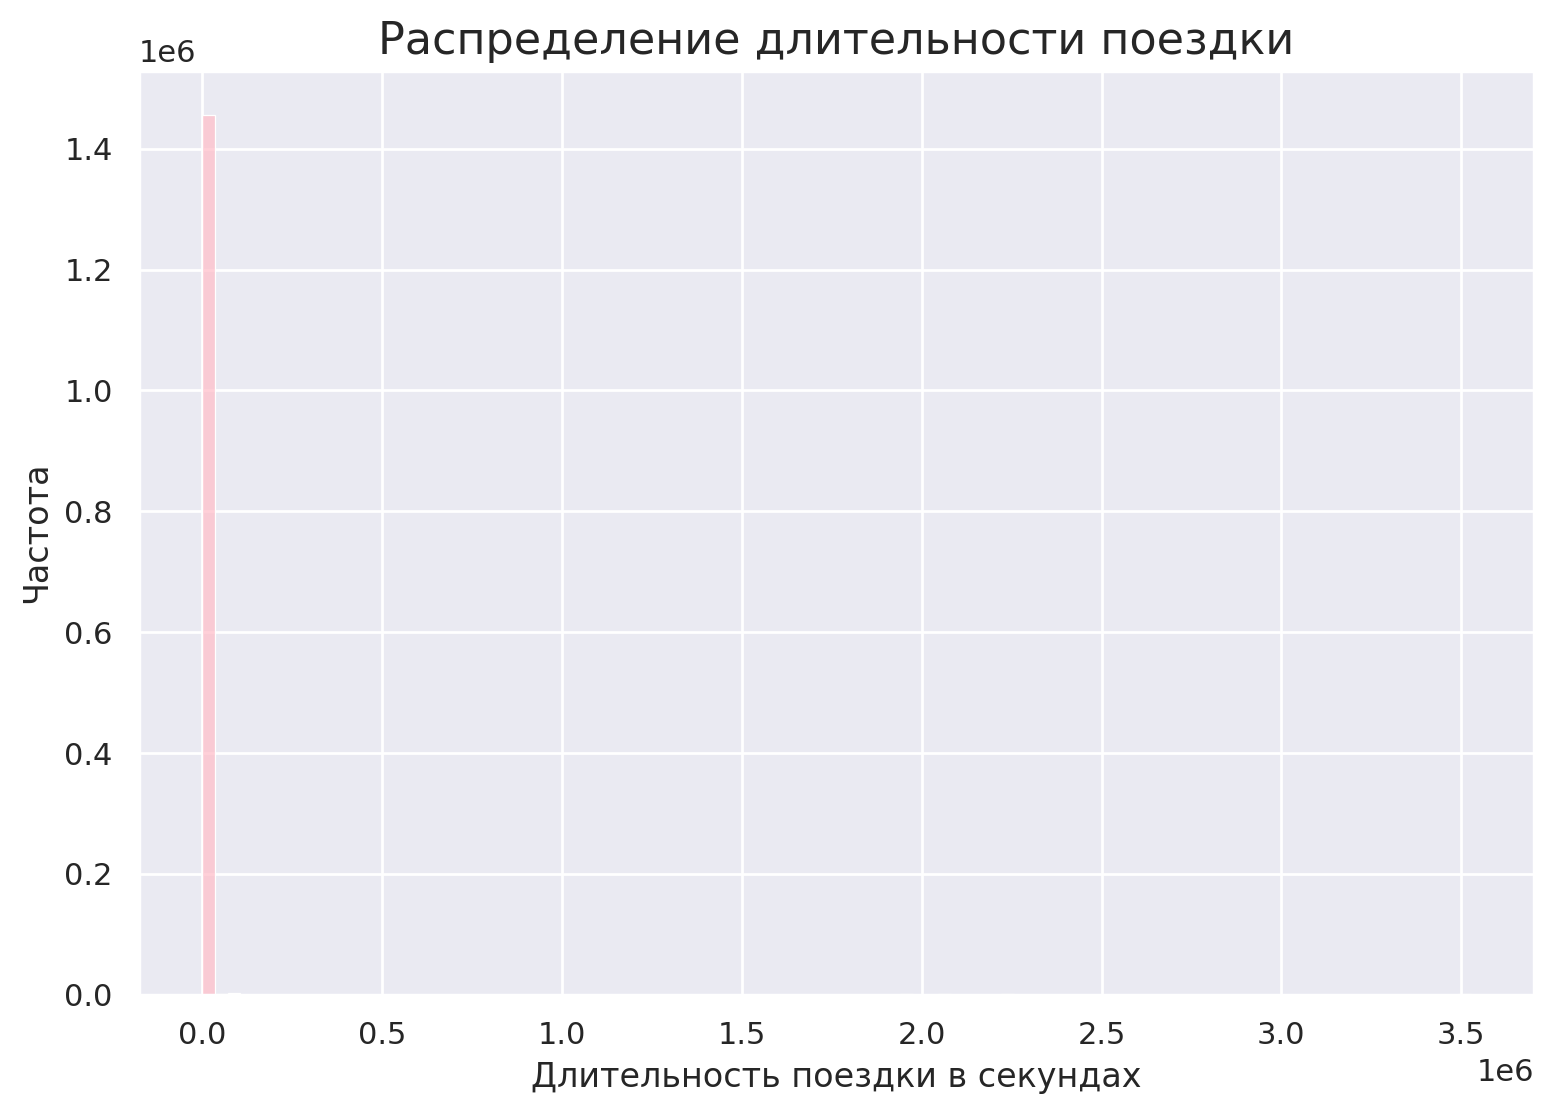

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(9, 6))
sns.histplot(df['trip_duration'], bins=100, kde=False, color = 'pink')
plt.title('Распределение длительности поездки', fontsize=16)
plt.xlabel('Длительность поездки в секундах', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()
#все значения сжаты около нуля, так как у нас есть очень большие значения, которые сильно отличаются от остальных
#получается, что все значения  сгруппированы около нуля( даже если они отличны от нуля), так как гисторграмма раятнута слишком болтшими значениями

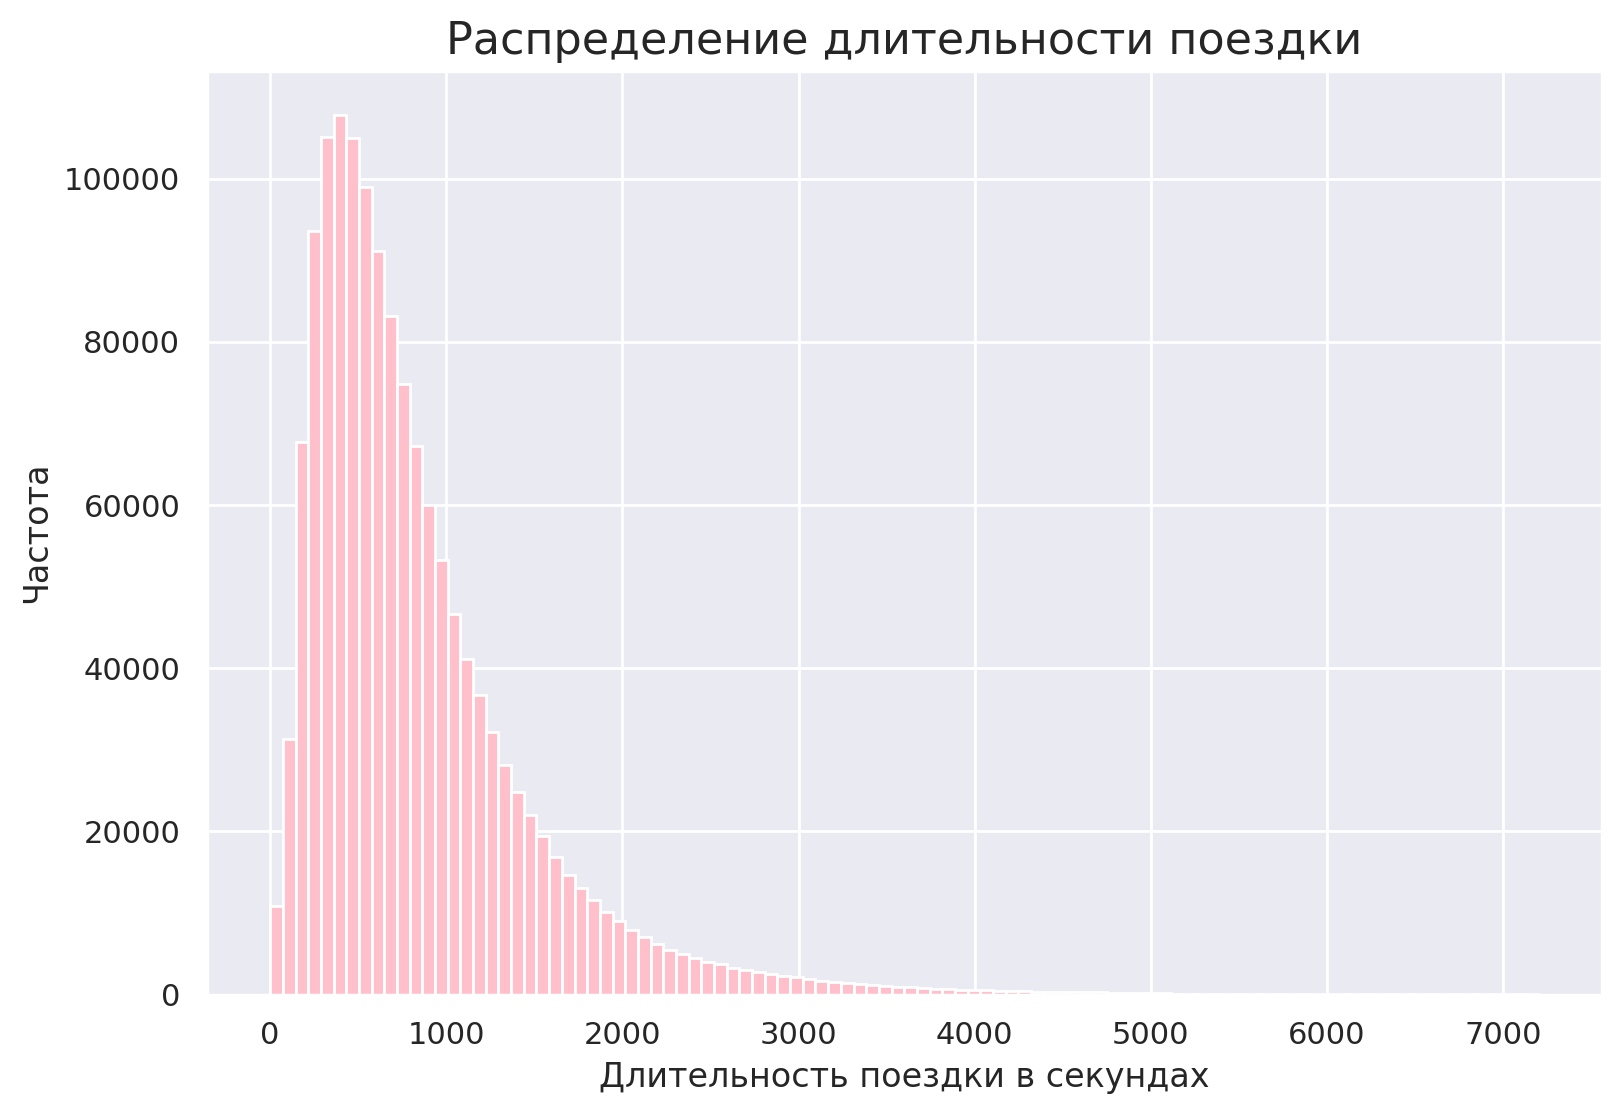

In [8]:
#теперь введем ограничение на диапазон значения(например, два часа)
plt.figure(figsize=(9, 6))
plt.hist(list(df['trip_duration']), bins=100, range=(0, 7200), color = 'pink')
plt.title('Распределение длительности поездки', fontsize=16)
plt.xlabel('Длительность поездки в секундах', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()
#нет выбросов, гистограмма выглядит нагляднее

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Ответ Мы не видим нормального распределения, правый хвост у нас длиннее. Пиковое значение гистограммы находится в значении около 500 секунд. Более того, в наших данных определенно присутсвуют выбросы целевой переменной(слишком большие значения относительно остальных).

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

В нашем случае лучше использовать RMSLE, так как у нас довольно большой диапазон значений целевой переменной, из-за чего появляются разброс между разными значениями. Используется логарифм, так как он сглаживает разницу между короткими поездками и длинными. Также менее чувсвителен к выбросам, а как мы заметили ранее, они у нас есть(и в худшем исходе могут сильно повлиять на наш прогноз). Более того, к целевой переменной добавляется единица, чтобы избежать ситуации, когда мы берем логарифм по нулю.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Запишем наш функционал, обозначив $\hat{y}_i = \log{(y_i + 1)}$

$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

Мы видим, что у нас получилось RMSE. Для RMSE можем использовать ту же оптимизацию, что и для MSE, просто убрав корень.


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['new_trip_duration'] = np.log1p(df['trip_duration'])

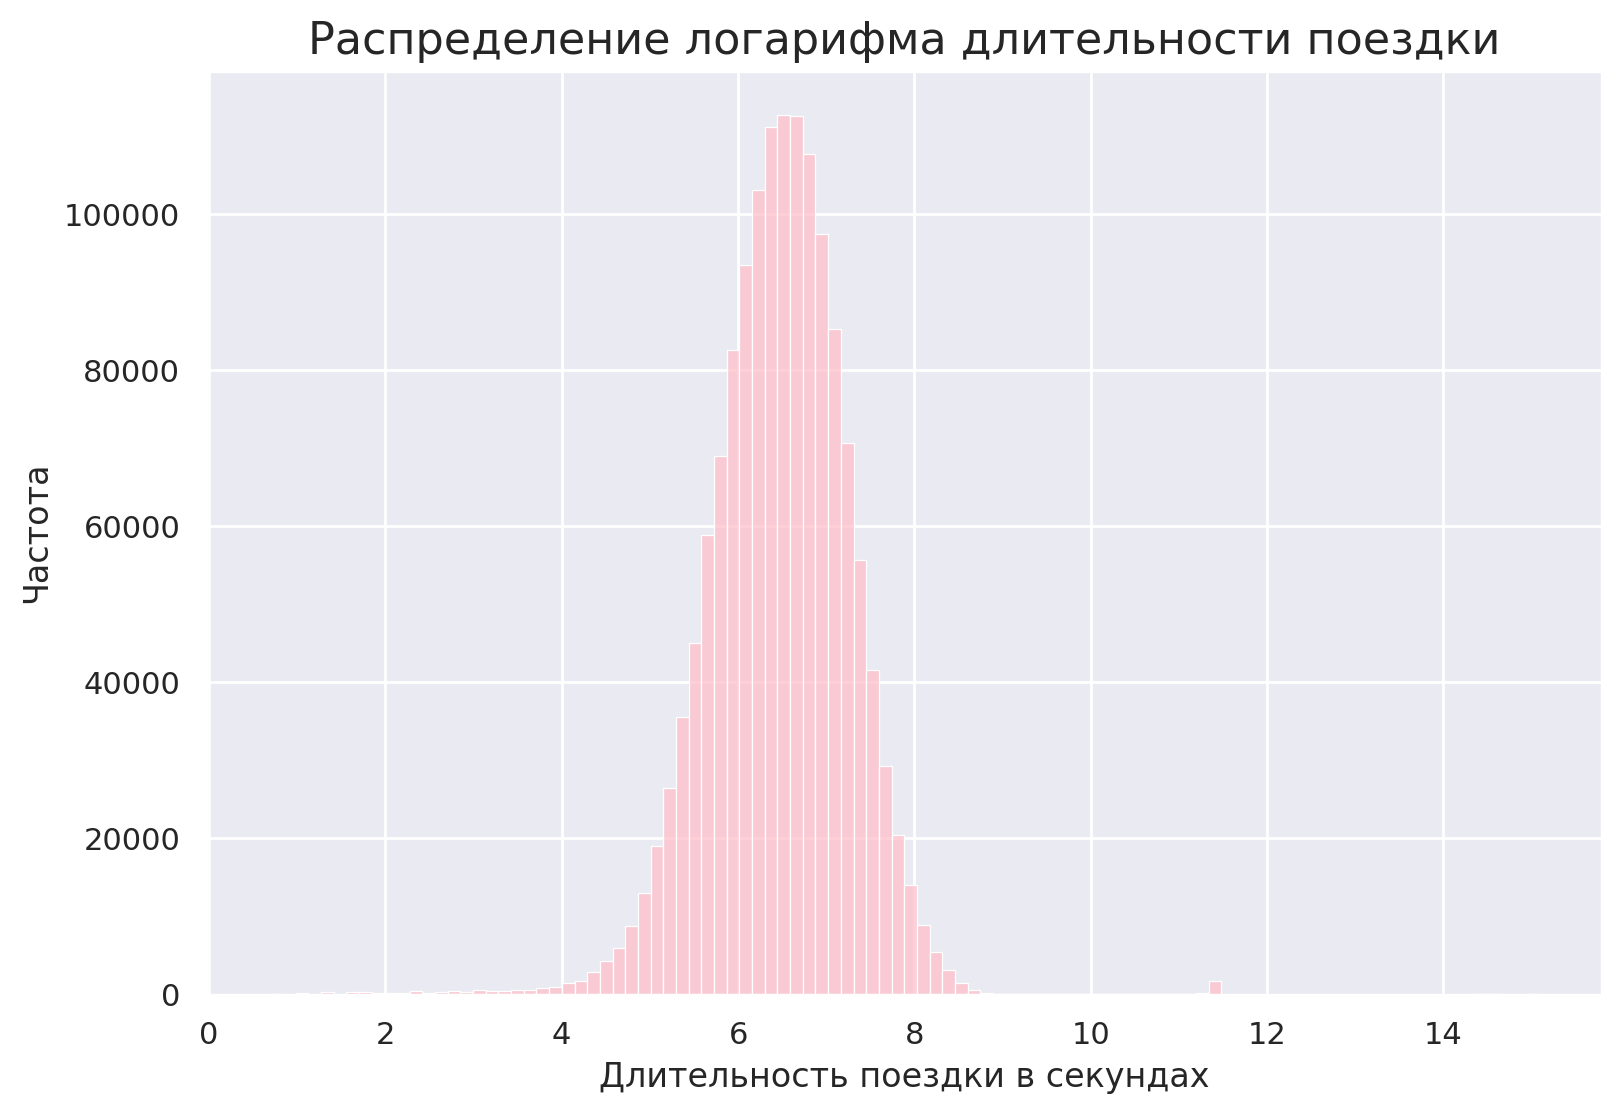

In [10]:
plt.figure(figsize=(9, 6))
sns.histplot(df['new_trip_duration'], bins=100, kde=False, color = 'pink')
plt.title('Распределение логарифма длительности поездки', fontsize=16)
plt.xlabel('Длительность поездки в секундах', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()
# теперь похоже на нормальное

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [11]:
df.drop('trip_duration', axis=1)

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  new_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

Будем использовать среднее

In [12]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    raise NotImplementedError

rmsle_best_const = rmsle(df['new_trip_duration'], np.mean(df['new_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

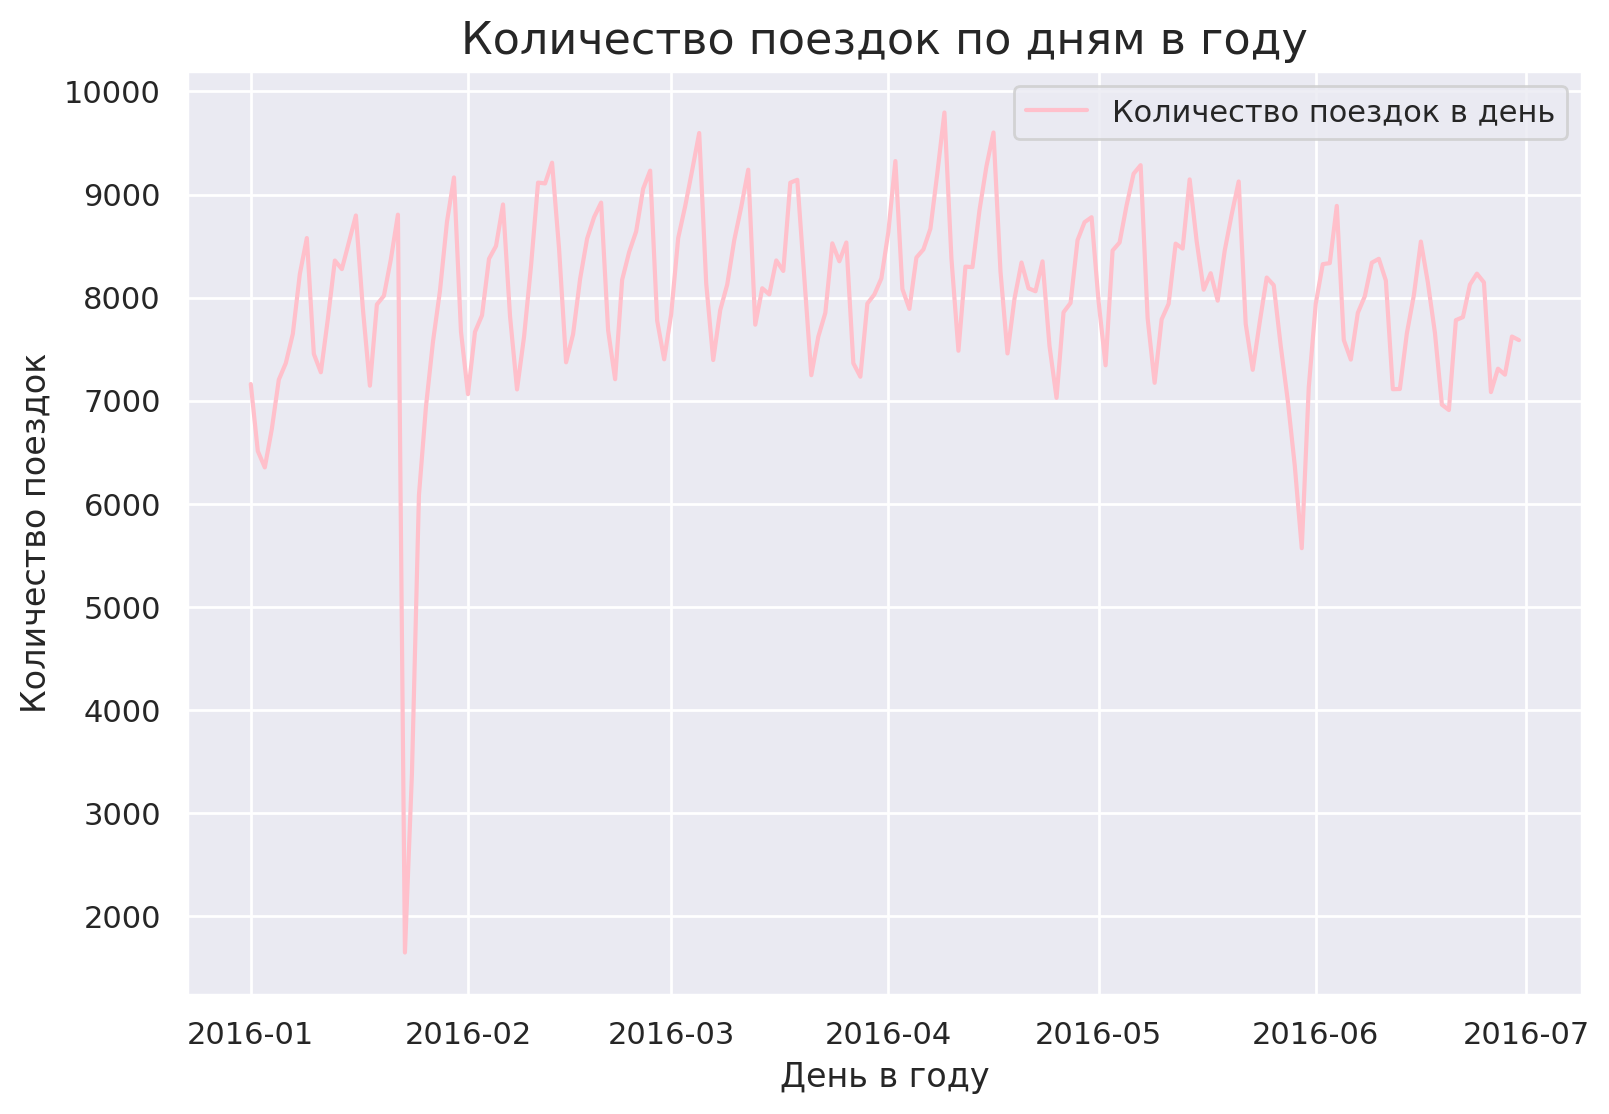

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day'] = df['pickup_datetime'].dt.date
trips_per_day = df.groupby('day').size()

plt.figure(figsize=(9, 6))
plt.plot(trips_per_day.index, trips_per_day.values, label="Количество поездок в день", color = 'pink')


plt.title('Количество поездок по дням в году', fontsize=16)
plt.xlabel('День в году', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

<ipython-input-14-d5a4afe6a95c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df.sort_values(by='day'), palette=colors, legend=False)


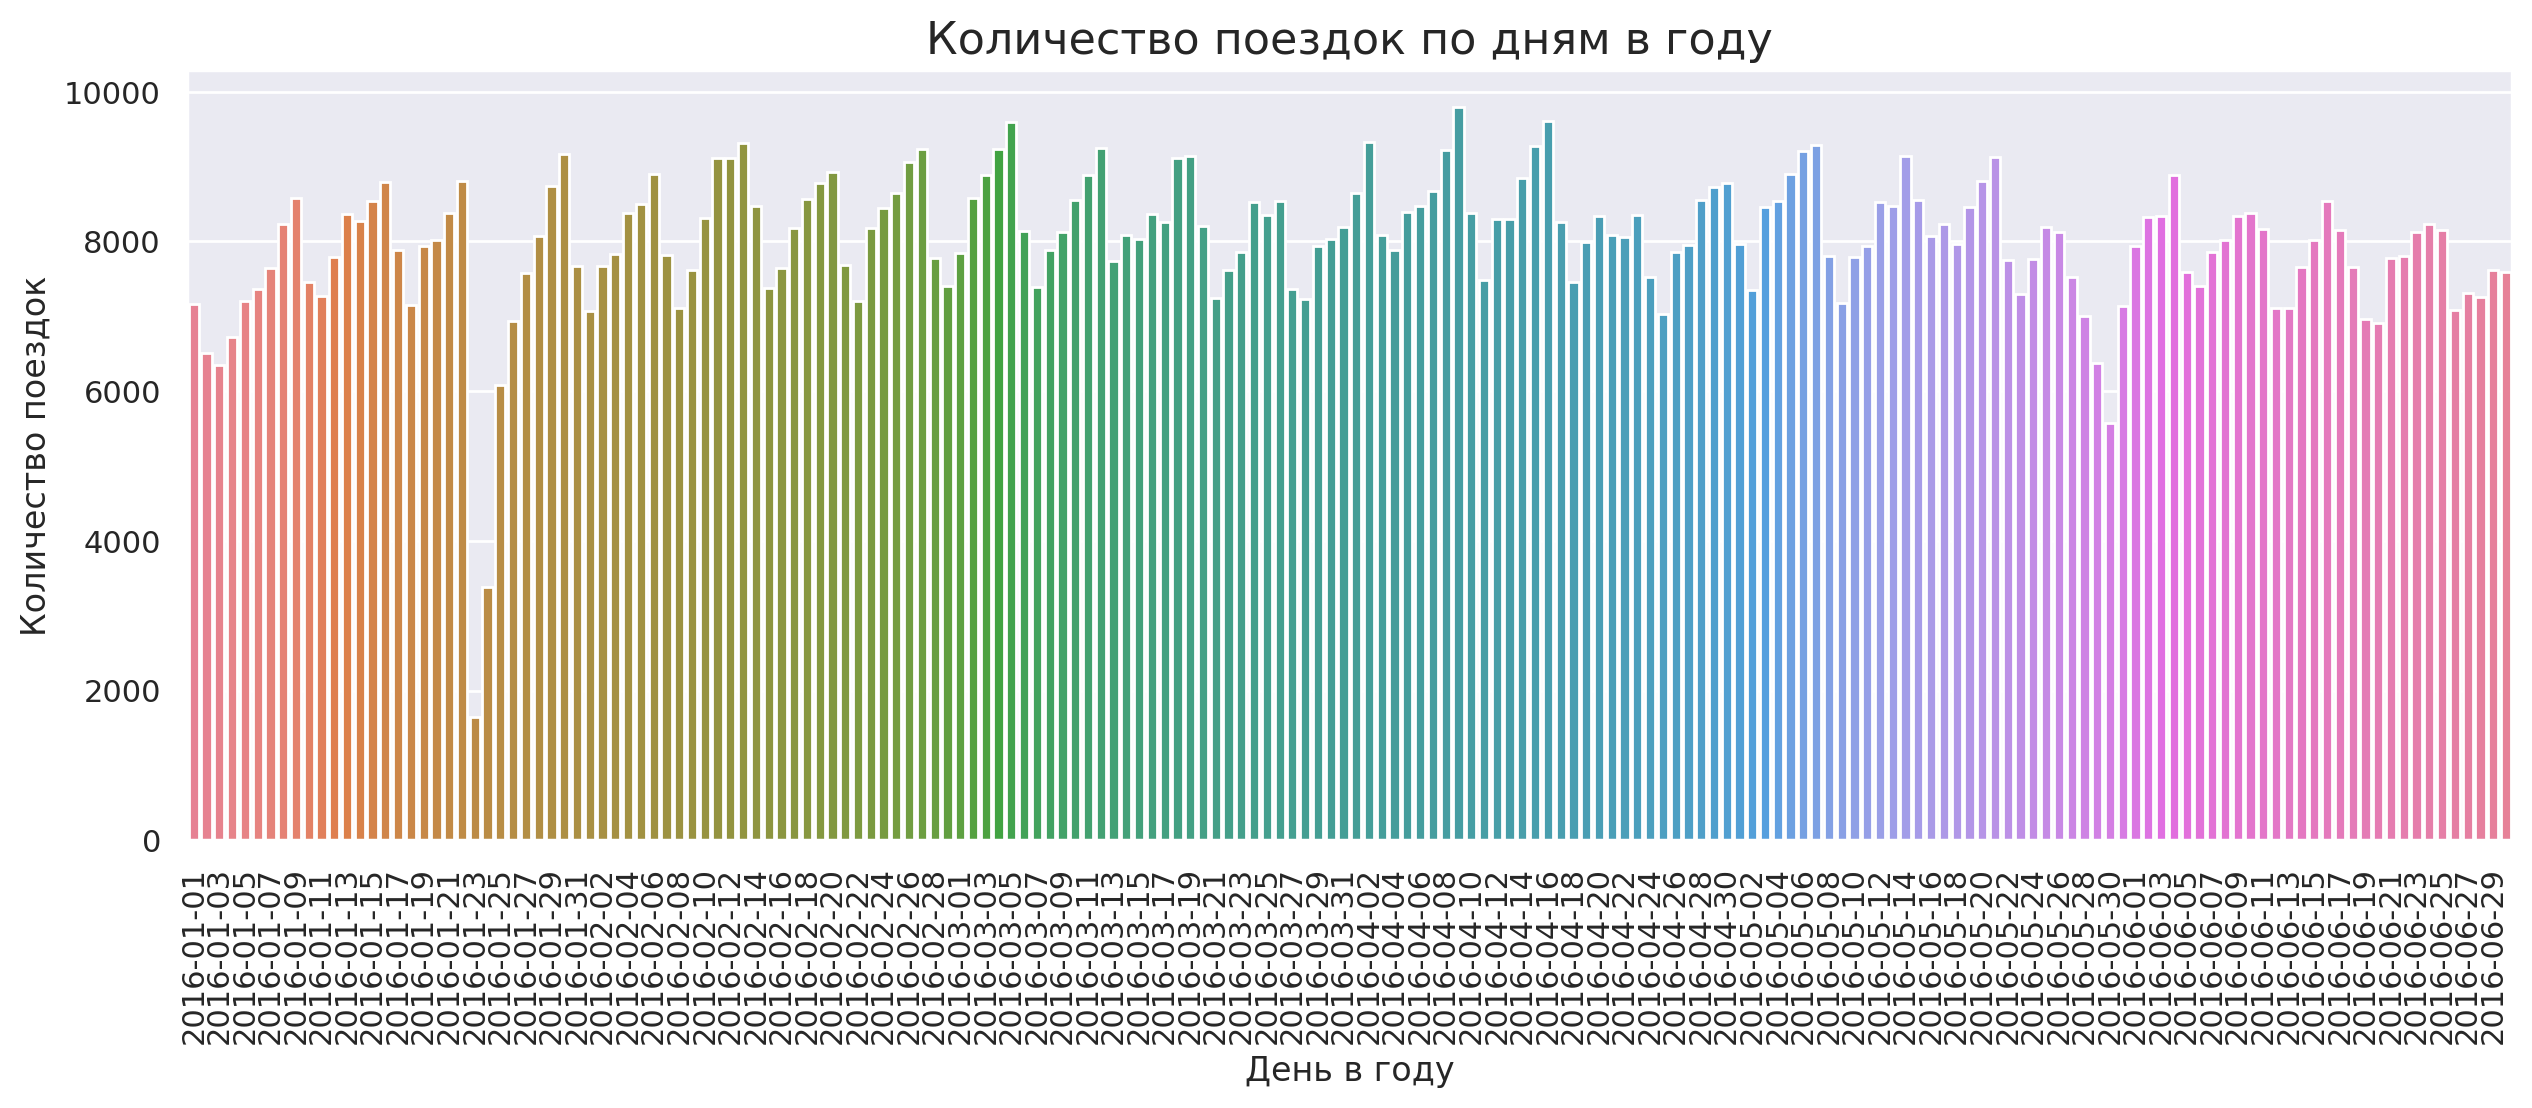

In [14]:
#или можем вот так представить
plt.figure(figsize=(15, 5))
colors = sns.color_palette("husl", len(df['day'].value_counts().sort_index()))
sns.countplot(x='day', data=df.sort_values(by='day'), palette=colors, legend=False)
ticks, labels = plt.xticks()
plt.xticks(ticks[::2], labels[::2], rotation=90)
plt.xlabel('День в году', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Количество поездок по дням в году', fontsize=16)


plt.show()


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.groupby(['day']).size().nsmallest(10)

day
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
2016-05-29    6372
2016-01-02    6512
2016-01-04    6725
2016-06-20    6910
2016-01-26    6941
dtype: int64

2016-01-23 - самая опасная снежная буря на востоке США(в Нью-Йорке ожидается от 20 до 30 см осадков) - https://www.bbc.com/russian/news/2016/01/160123_usa_massive_blizzard

2016-05-29 - на следующий день был Memorial Day, также в это день произошел сбой в работе информационной системы аэропорта имени Джона Кеннеди в Нью-Йорке. https://www.tadviser.ru/index.php/Компания:Аэропорт_Нью-Йорка_им._Джона_Кеннеди_(JFK_Airport)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

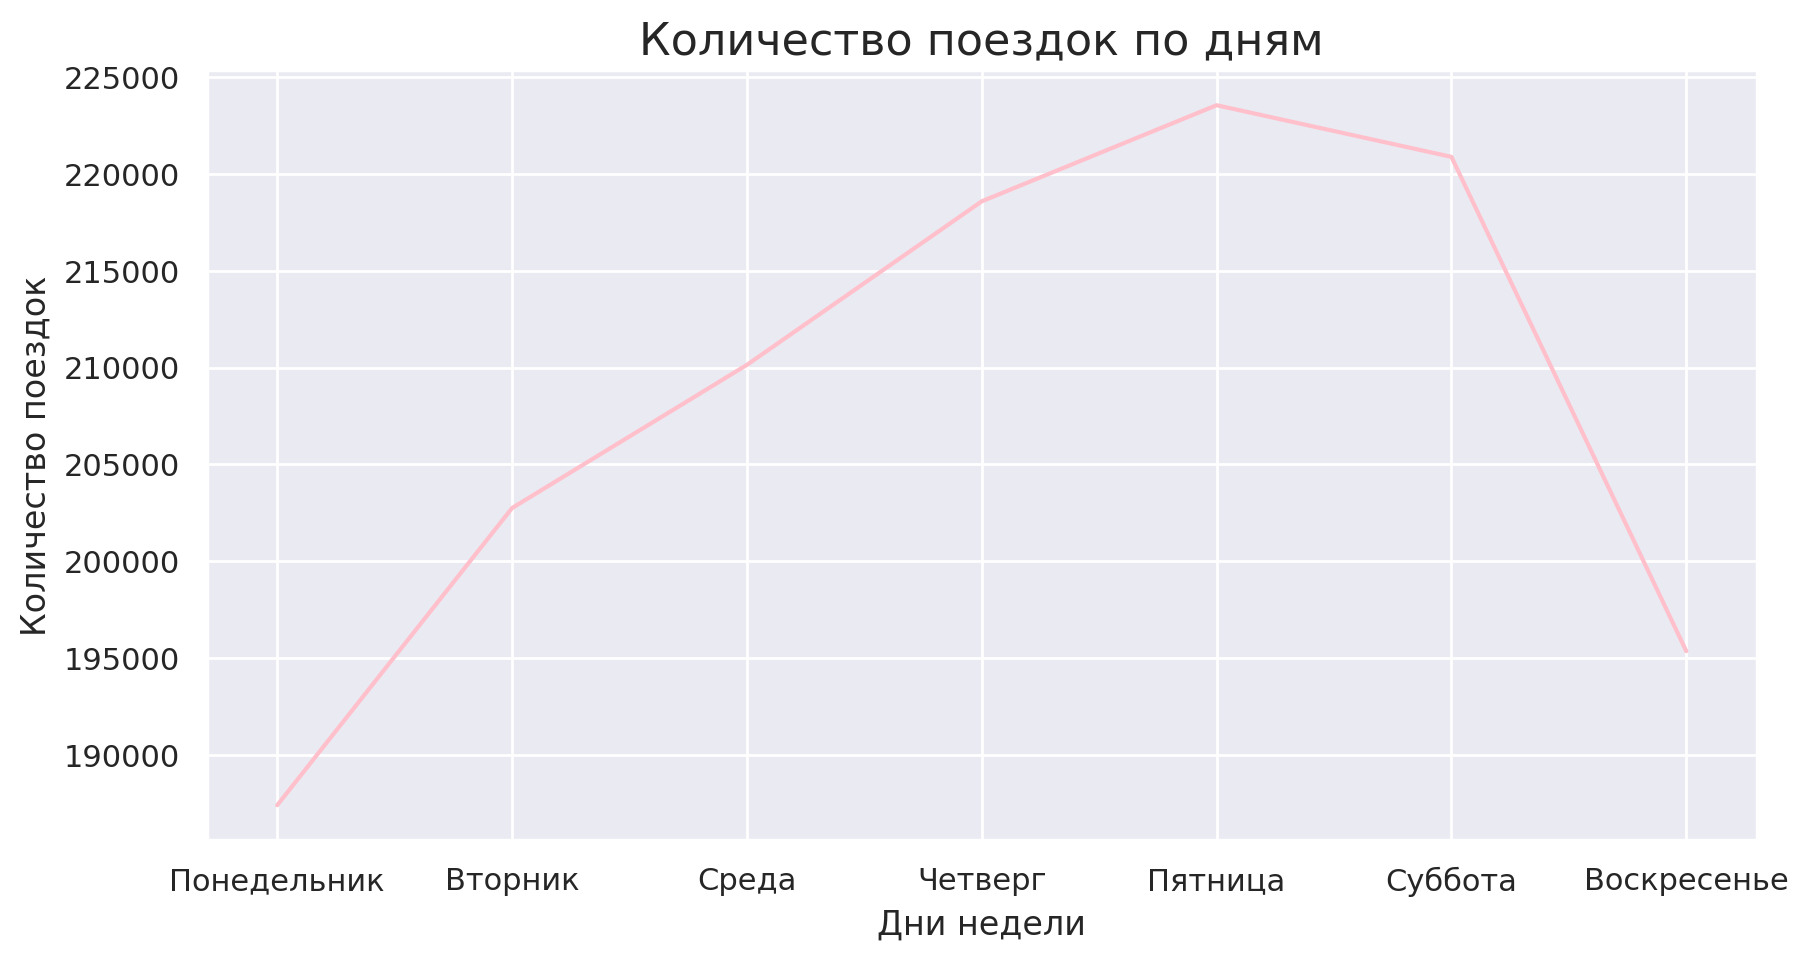

In [16]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data=pd.DataFrame(df.groupby(df['pickup_datetime'].dt.weekday)['id'].count()), y='id', x='pickup_datetime',color='pink')
plt.xlabel('Дни недели')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 7), ('Понедельник','Вторник','Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'))
plt.title('Количество поездок по дням', fontsize=16)
plt.show()


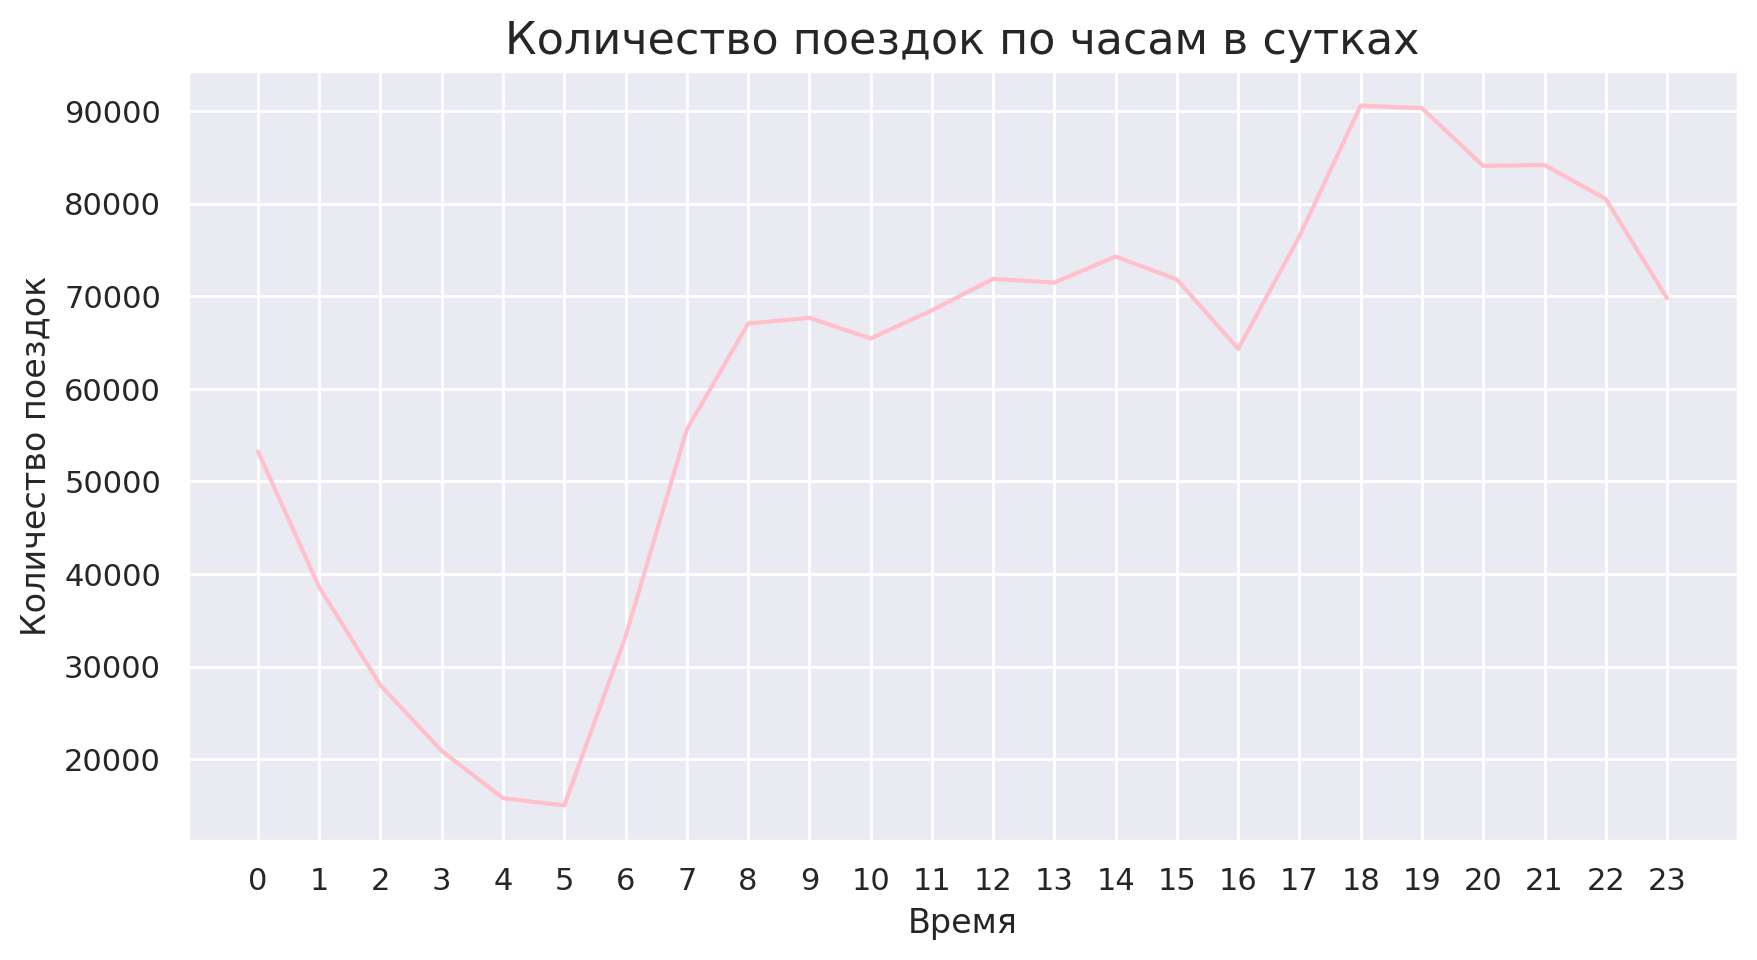

In [17]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data=pd.DataFrame(df.groupby(df['pickup_datetime'].dt.hour)['id'].count()), y='id', x='pickup_datetime',color='pink')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.title('Количество поездок по часам в сутках', fontsize=16)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

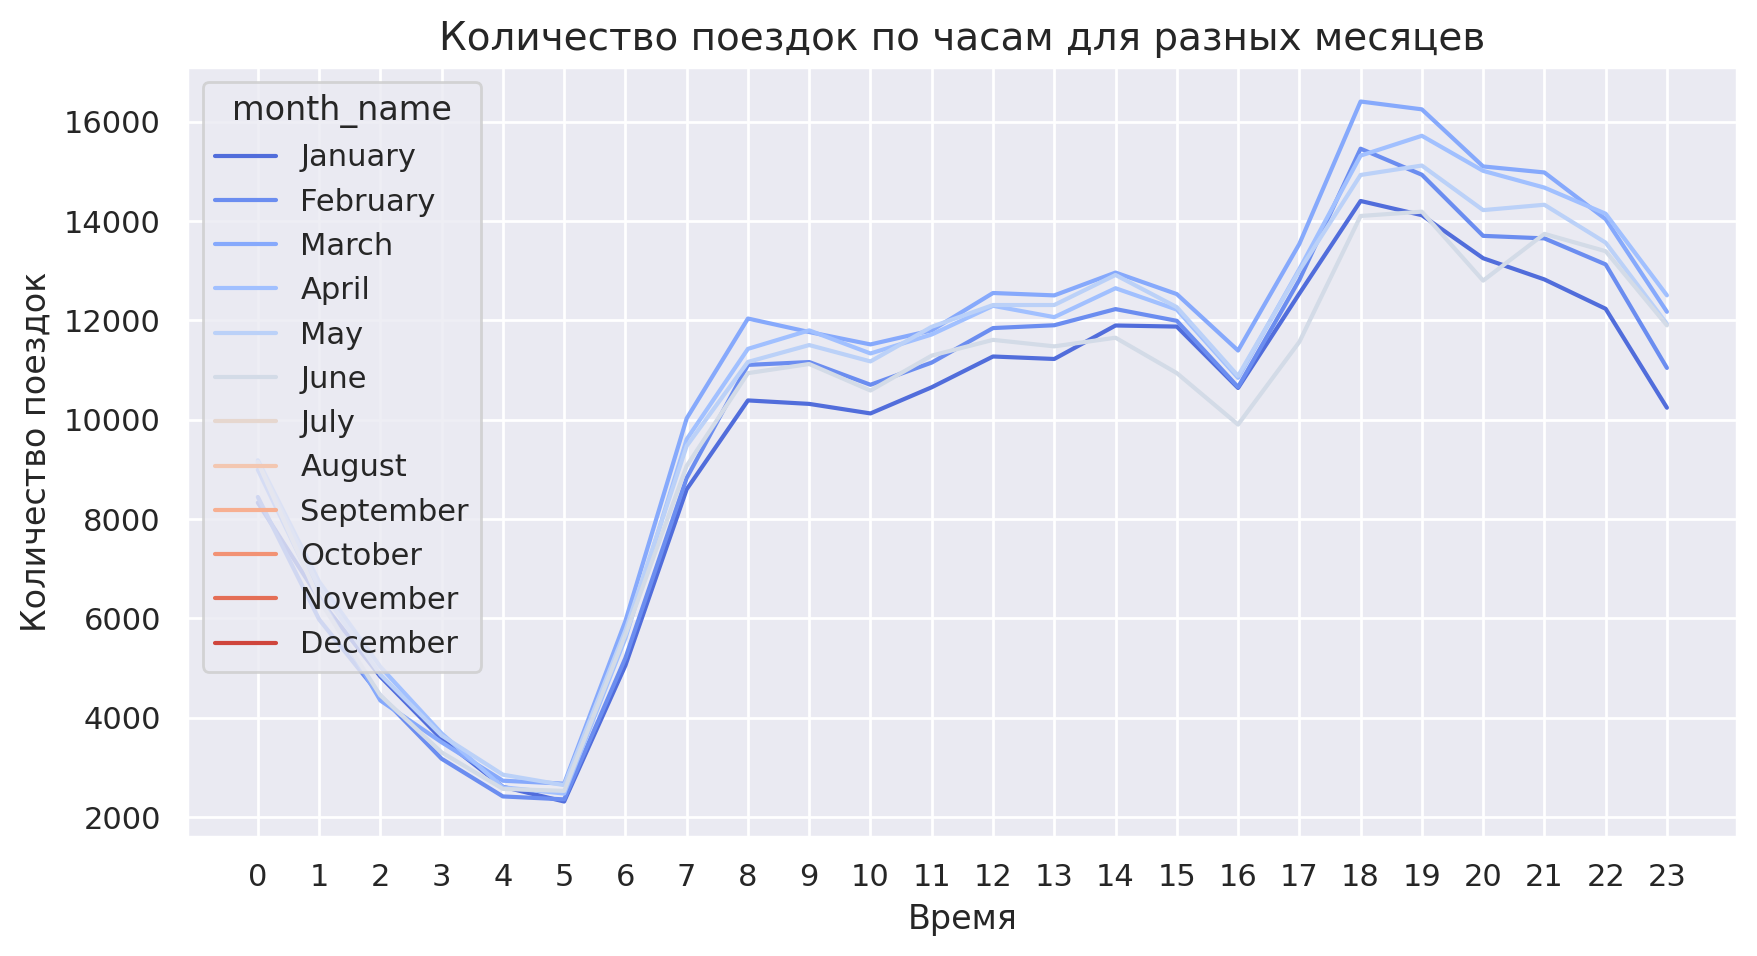

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['month_name'] = df['pickup_datetime'].dt.month_name()

months = pd.DataFrame(df.groupby([df['month_name'], df['pickup_datetime'].dt.hour])['id'].count())
months.index = months.index.rename(['month_name', 'hours'])
months.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=months, x='hours', y='id', hue='month_name',
             hue_order=['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December'], palette=sns.color_palette('coolwarm', 12))


plt.xlabel('Время', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Количество поездок по часам для разных месяцев', fontsize=14)
plt.xticks(range(24))
plt.grid(True)
plt.show()

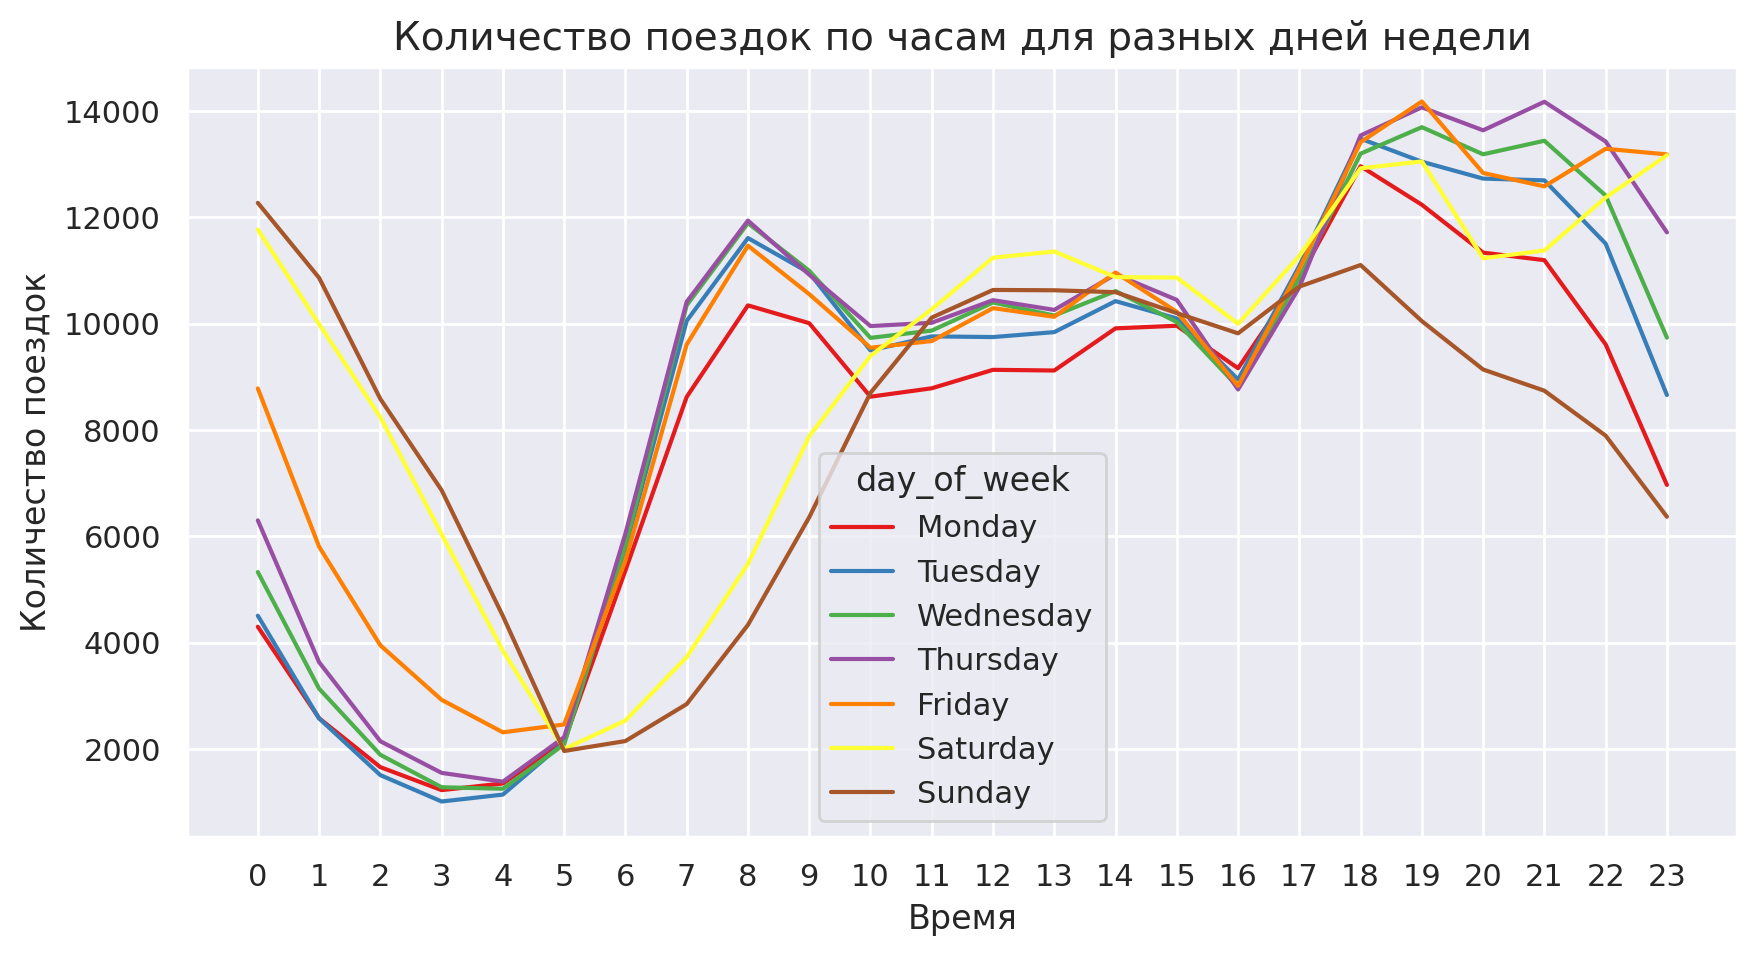

In [19]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
days = pd.DataFrame(df.groupby([df['day_of_week'], df['pickup_datetime'].dt.hour])['id'].count())
days.index = days.index.rename(['day_of_week', 'hours'])
days.reset_index(inplace=True)
plt.figure(figsize=(10, 5))
sns.lineplot(data=days, x='hours', y='id', hue='day_of_week',
             hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=sns.color_palette('Set1', 7))

plt.xlabel('Время', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.title('Количество поездок по часам для разных дней недели', fontsize=14)
plt.xticks(range(24))
plt.grid(True)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

1) Оценим по дням недели. Количество поездок увеличивается в течение недели с понедельника по пятницу (максимум в пятницу), убывает в субботу и воскресенье.

2) По часам. Минимум видим около пяти утра, потом растет до 7 утра(начало рабочего дня), потом довольно стабильно. Снова растет с 17 до 20(конец рабочего дня). Потом снижается.

3) Количество поездок по часам для разных месяцев. Графики по часам примерно одинаковые. Едиственное можно заметить, что в январе и июне меньше поездок, чем в остальных месяцах.

4) Количество поездок по часам для разных дней недели. Графики также имеют общие тенденции. Графики для дней со вторника по пятницу наиболее приближены (выше в течение недели). График для понедельника ниже всех остальных для большинтсва времени. Графики для субботы и воскресенья значительно выше для времени с 0 утра до 5 утра(т. к. выходные), потом с 6 до 11 сильно ниже остальных графиков(нет работы). Можно также отметить, что график для воскресенья ниже остальных в период с 17 до 23.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

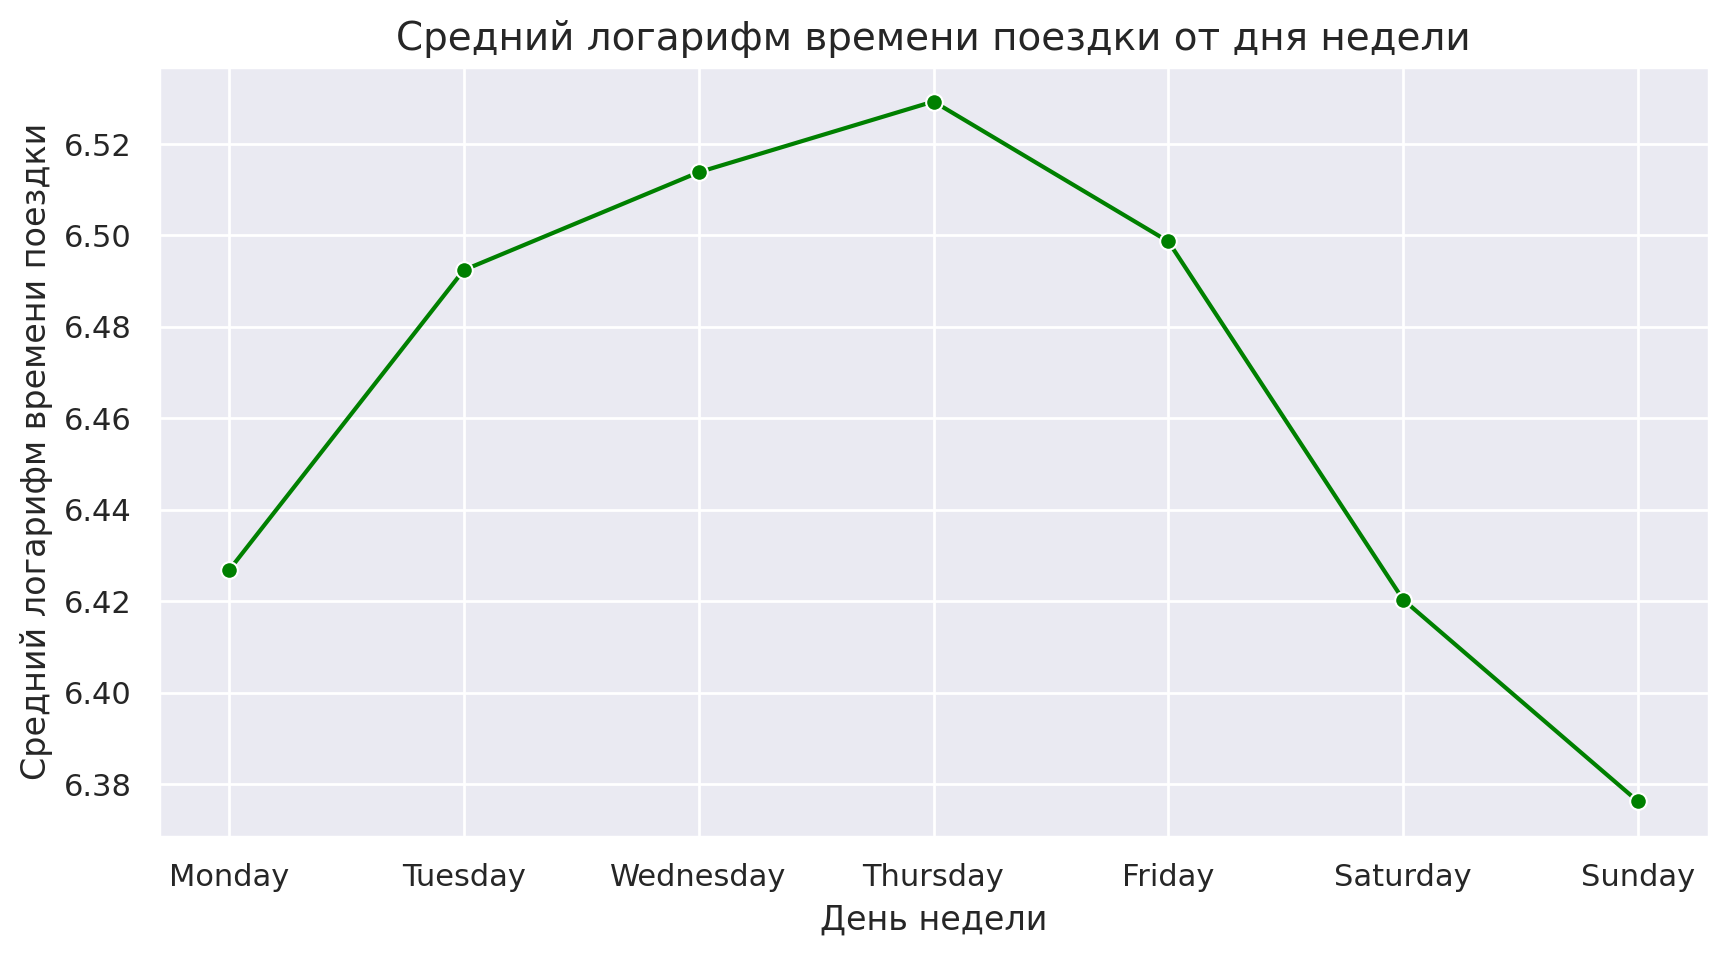

In [21]:
plt.figure(figsize=(10, 5))
dep_days = train.groupby('day_of_week')['new_trip_duration'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.lineplot(x=dep_days.index, y=dep_days.values, marker='o', color='green')
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Средний логарифм времени поездки', fontsize=12)
plt.title('Средний логарифм времени поездки от дня недели', fontsize=14)
plt.grid(True)
plt.show()


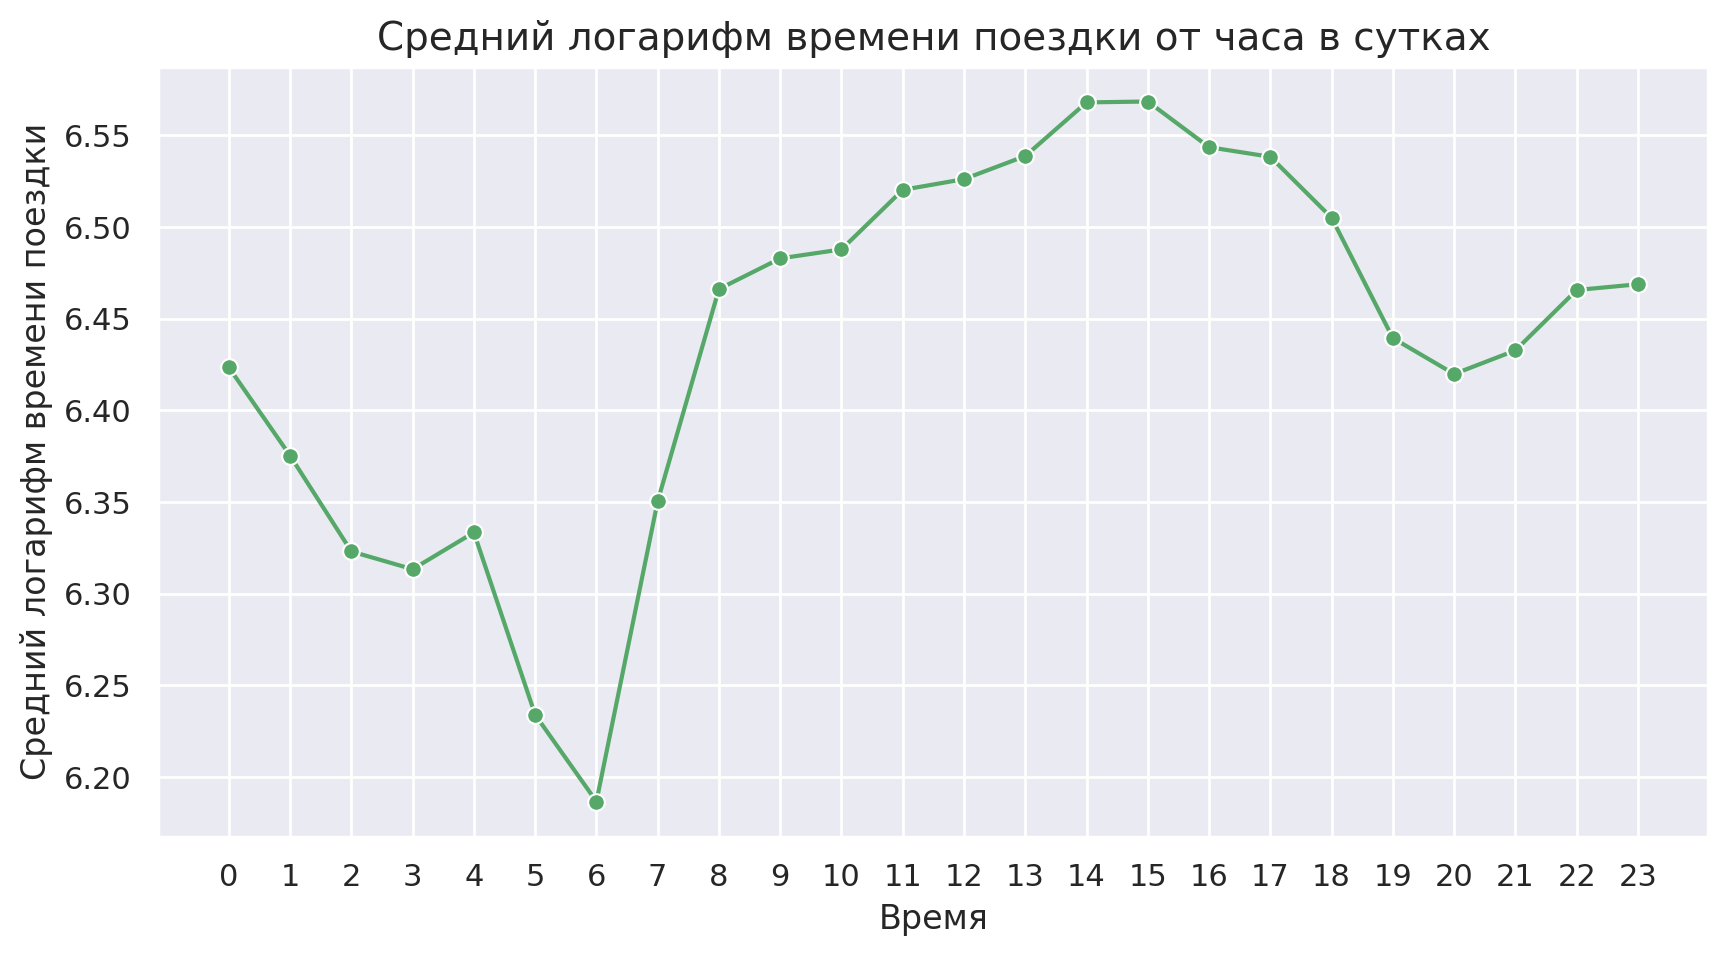

In [22]:
plt.figure(figsize=(10, 5))
dep_hour = train.groupby(train['pickup_datetime'].dt.hour)['new_trip_duration'].mean()
sns.lineplot(x=dep_hour.index, y=dep_hour.values, marker='o', color='g')
plt.xlabel('Время', fontsize=12)
plt.ylabel('Средний логарифм времени поездки', fontsize=12)
plt.title('Средний логарифм времени поездки от часа в сутках', fontsize=14)
plt.xticks(range(24))
plt.grid(True)
plt.show()

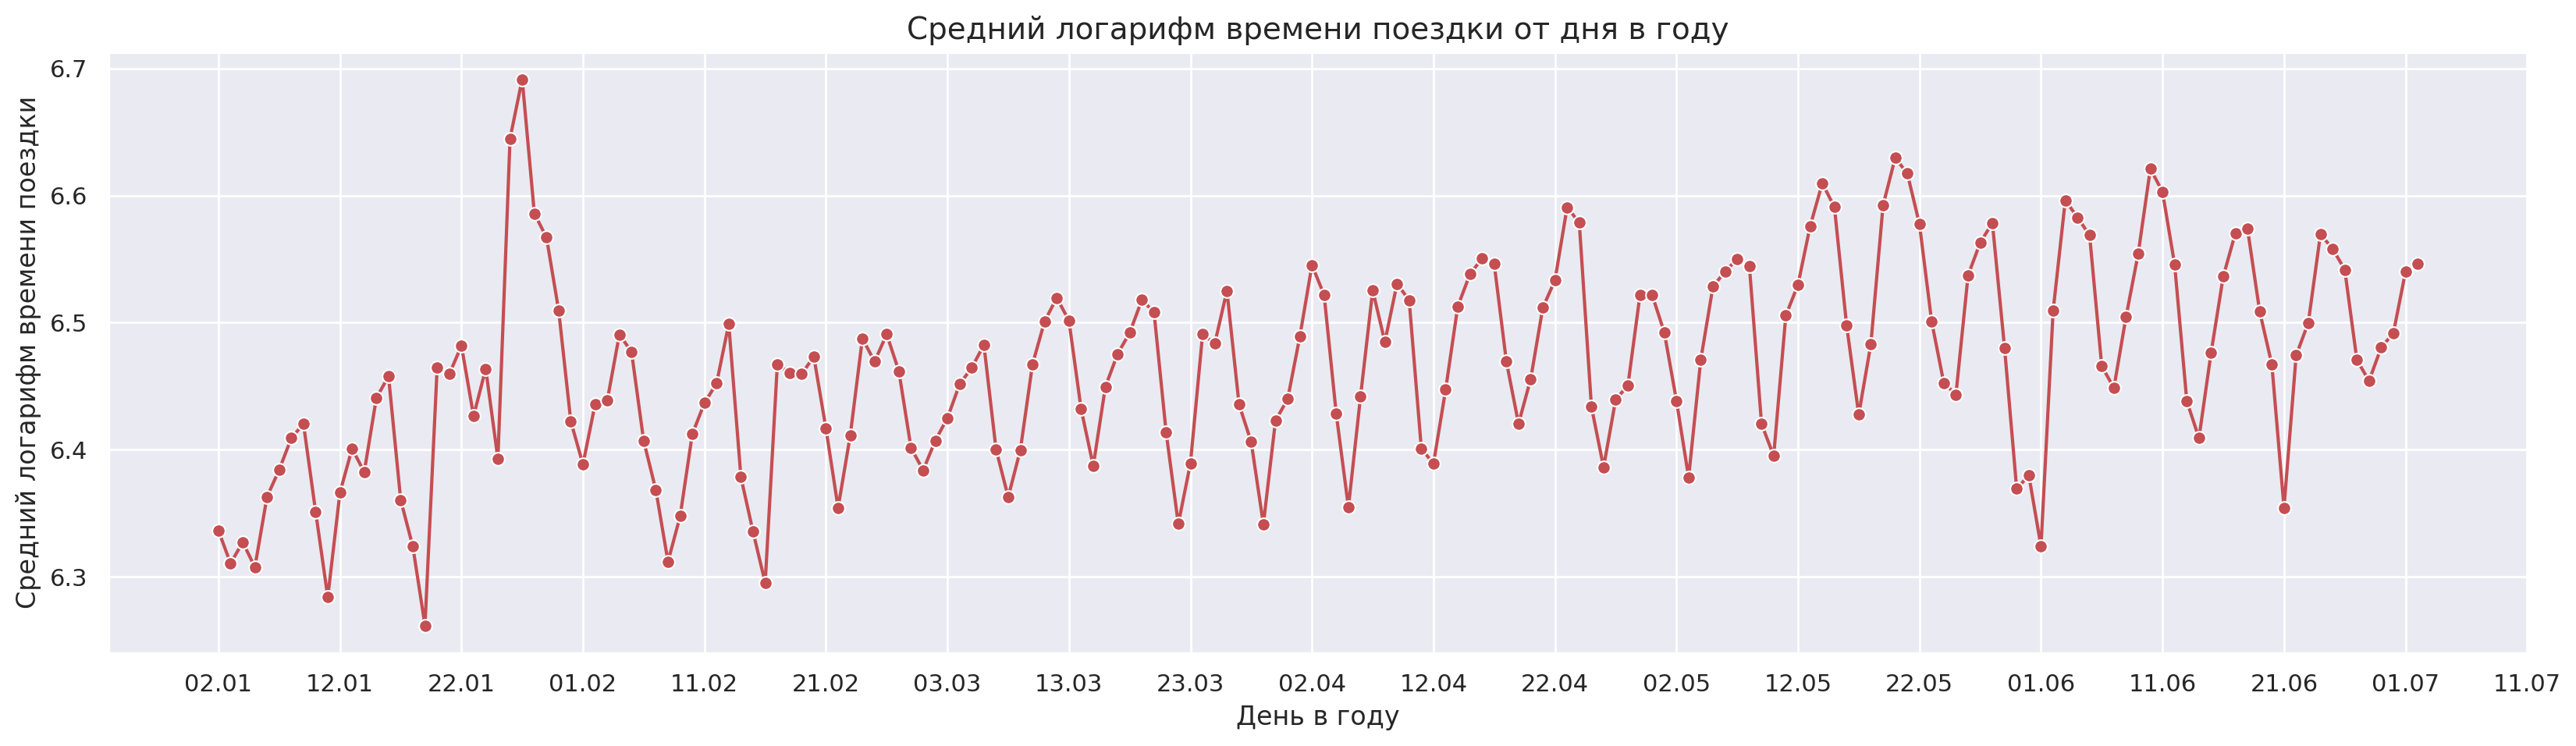

In [23]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 5))
dep_year = train.groupby(train['pickup_datetime'].dt.dayofyear)['new_trip_duration'].mean()


sns.lineplot(x=dep_year.index, y=dep_year.values, marker='o', color='r')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))


plt.xlabel('День в году', fontsize=12)
plt.ylabel('Средний логарифм времени поездки', fontsize=12)
plt.title('Средний логарифм времени поездки от дня в году', fontsize=14)
plt.grid(True)


plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

График среднего логарифма времени поездки от дня недели похож на аналогичный с количесвом поездок. Но можно заметить определенный сдвиг(раньше пик в пятницу, сейчас же в четверг), это может быть связано с тем, что спад по времени происходит в пятницу из-за того, что люди проводят свободное время и передвигаются на короткие расстояния, следовательно количество поездок увеличивается.

В график среднего логарифма времени поездки от часа в сутках так же можно заметить схожесть. Но есть различия: локальный максимум около 4 часов, еще можно заметить, что длительность поездки продолжает расти и после 10 часов(хотя в прошлом графике там не было возрастающей части), еще видно снижение на уровне с 15 до 20 (раньше был рост) и рост от 20 до 23 (раньше был спад). В целом графики похожи, так как если много поездок - выше загруженность, следовательно и поездка дольше.

С аномальными точками можно заметить, что первый аномальный период наоборот теперь является максимумом. В первый пик - снежная буря, большая загруженность - длительность поездки увеличилась.
Второй пик - локальный мимнимум, так как никто не выходил из дома, так как праздник.

 На графике зависимости log_trip_duration от номера дня в год можно заметить периодические колебания по дням недели. Также сеть небольшой тренд в том, что возрастает от зимы к весне.




Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['weekday'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

In [25]:
train['weekday'] = train['pickup_datetime'].dt.dayofweek
train['month'] = train['pickup_datetime'].dt.month
train['hour'] = train['pickup_datetime'].dt.hour
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
test['weekday'] = test['pickup_datetime'].dt.dayofweek
test['month'] = test['pickup_datetime'].dt.month
test['hour'] = test['pickup_datetime'].dt.hour
test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

In [26]:
snow_dates = pd.to_datetime(['2016-01-23', '2016-01-24']).date
memorial_day_date = pd.to_datetime('2016-05-30').date()
train['snow'] = train['pickup_datetime'].dt.date.isin(snow_dates).astype(int)
train['memorial_day'] = (train['pickup_datetime'].dt.date == memorial_day_date).astype(int)


test['memorial_day'] = (test['pickup_datetime'].dt.date == memorial_day_date).astype(int)
test['snow'] = test['pickup_datetime'].dt.date.isin(snow_dates).astype(int)


In [27]:
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
1011257         40.763680                  N            844   
178550          40.788933                  N           1001   
551460          40.768608                  N           1048   
1434271         40.752213                  N            784   
1173610         40.789875                  N            732   

         new_trip_duration         day month_name day_of_week  weekday  month  \
1011257           6.739337  2016-05-03        May     Tuesday        1      5   
178550            6.909753  2016-01-01    January      Friday        4      1   
551460            6.955593  2016-04-24      April      Sunday        6      4   
1434271           6.665684  2016-01-10    January      Sunday        6      1   
1173610           6.597146  2016-02-25   February    Thursday        3      2   

         hour  day_of_year  snow  memorial_day  
1011257     9          124     0             0  
178550     16            1     0             0  
551460     13          115     0             0  
1434271    17           10     0             0  
1173610    17           56     0             0

In [28]:
test.head()

id  vendor_id     pickup_datetime  passenger_count  \
67250    id2793718          2 2016-06-08 07:36:19                1   
1397036  id3485529          2 2016-04-03 12:58:11                1   
1021087  id1816614          2 2016-06-05 02:49:13                5   
951424   id1050851          2 2016-05-05 17:18:27                2   
707882   id0140657          1 2016-05-12 17:43:38                4   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
67250          -73.985611        40.735943         -73.980331   
1397036        -73.978394        40.764351         -73.991623   
1021087        -73.989059        40.744389         -73.973381   
951424         -73.990326        40.731136         -73.991264   
707882         -73.789497        40.646675         -73.987137   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
67250           40.760468                  N           1040   
1397036         40.749859                  N            827   
1021087         40.748692                  N            614   
951424          40.748917                  N            867   
707882          40.759232                  N           4967   

         new_trip_duration         day month_name day_of_week  weekday  month  \
67250             6.947937  2016-06-08       June   Wednesday        2      6   
1397036           6.719013  2016-04-03      April      Sunday        6      4   
1021087           6.421622  2016-06-05       June      Sunday        6      6   
951424            6.766192  2016-05-05        May    Thursday        3      5   
707882            8.510773  2016-05-12        May    Thursday        3      5   

         hour  day_of_year  memorial_day  snow  
67250       7          160             0     0  
1397036    12           94             0     0  
1021087     2          157             0     0  
951424     17          126             0     0  
707882     17          133             0     0

In [29]:
train[train['pickup_datetime'].dt.date == memorial_day_date]

id  vendor_id     pickup_datetime  passenger_count  \
531304   id3931617          2 2016-05-30 17:56:13                5   
389903   id0992350          1 2016-05-30 23:54:12                1   
885771   id1759585          2 2016-05-30 16:11:47                1   
1240676  id3407907          2 2016-05-30 19:07:49                1   
1453682  id0520400          2 2016-05-30 13:20:59                6   
...            ...        ...                 ...              ...   
806388   id3003314          2 2016-05-30 01:04:01                1   
668406   id0135192          2 2016-05-30 08:41:11                1   
994653   id3265490          2 2016-05-30 09:02:00                1   
1142424  id2795341          2 2016-05-30 05:06:45                1   
110268   id3551574          1 2016-05-30 22:10:21                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
531304         -73.990227        40.751251         -73.973160   
389903         -73.981804        40.752434         -73.964226   
885771         -73.988998        40.743221         -73.818947   
1240676        -73.967781        40.787621         -73.981506   
1453682        -73.976578        40.780571         -73.973633   
...                   ...              ...                ...   
806388         -73.948692        40.789001         -74.000381   
668406         -73.982162        40.778339         -73.990517   
994653         -73.959572        40.775326         -73.987892   
1142424        -73.977028        40.752098         -73.992607   
110268         -73.996506        40.753269         -73.997215   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
531304          40.754608                  N            646   
389903          40.629787                  N           1580   
885771          40.685379                  N           2036   
1240676         40.782742                  N            352   
1453682         40.763561                  N            378   
...                   ...                ...            ...   
806388          40.761700                  N           1013   
668406          40.761429                  N            325   
994653          40.779804                  N            467   
1142424         40.754494                  N            252   
110268          40.734928                  N            468   

         new_trip_duration         day month_name day_of_week  weekday  month  \
531304            6.472346  2016-05-30        May      Monday        0      5   
389903            7.365813  2016-05-30        May      Monday        0      5   
885771            7.619233  2016-05-30        May      Monday        0      5   
1240676           5.866468  2016-05-30        May      Monday        0      5   
1453682           5.937536  2016-05-30        May      Monday        0      5   
...                    ...         ...        ...         ...      ...    ...   
806388            6.921658  2016-05-30        May      Monday        0      5   
668406            5.786897  2016-05-30        May      Monday        0      5   
994653            6.148468  2016-05-30        May      Monday        0      5   
1142424           5.533389  2016-05-30        May      Monday        0      5   
110268            6.150603  2016-05-30        May      Monday        0      5   

         hour  day_of_year  snow  memorial_day  
531304     17          151     0             1  
389903     23          151     0             1  
885771     16          151     0             1  
1240676    19          151     0             1  
1453682    13          151     0             1  
...       ...          ...   ...           ...  
806388      1          151     0             1  
668406      8          151     0             1  
994653      9          151     0             1  
1142424     5          151     0             1  
110268     22          151     0             1  

[3916 rows x 20 columns]

In [30]:
snow_memorial_days = train[(train['snow'] == 1) | (train['memorial_day'] == 1)]
snow_memorial_days

id  vendor_id     pickup_datetime  passenger_count  \
210022   id2088540          1 2016-01-24 18:29:41                2   
531304   id3931617          2 2016-05-30 17:56:13                5   
389903   id0992350          1 2016-05-30 23:54:12                1   
885771   id1759585          2 2016-05-30 16:11:47                1   
157294   id3694746          1 2016-01-23 06:12:40                1   
...            ...        ...                 ...              ...   
1142424  id2795341          2 2016-05-30 05:06:45                1   
579036   id2887057          1 2016-01-24 14:35:06                1   
136330   id0975136          2 2016-01-24 08:03:11                2   
906606   id3165072          1 2016-01-23 06:15:14                1   
110268   id3551574          1 2016-05-30 22:10:21                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
210022         -73.992607        40.750561         -74.177589   
531304         -73.990227        40.751251         -73.973160   
389903         -73.981804        40.752434         -73.964226   
885771         -73.988998        40.743221         -73.818947   
157294         -73.986389        40.761478         -73.980431   
...                   ...              ...                ...   
1142424        -73.977028        40.752098         -73.992607   
579036         -73.844009        40.721226         -73.860023   
136330         -73.776665        40.645805         -73.794968   
906606         -73.938690        40.805050         -73.940170   
110268         -73.996506        40.753269         -73.997215   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
210022          40.690598                  N           1743   
531304          40.754608                  N            646   
389903          40.629787                  N           1580   
885771          40.685379                  N           2036   
157294          40.782887                  N            752   
...                   ...                ...            ...   
1142424         40.754494                  N            252   
579036          40.704838                  N            496   
136330          40.718040                  N           1025   
906606          40.834282                  N            953   
110268          40.734928                  N            468   

         new_trip_duration         day month_name day_of_week  weekday  month  \
210022            7.463937  2016-01-24    January      Sunday        6      1   
531304            6.472346  2016-05-30        May      Monday        0      5   
389903            7.365813  2016-05-30        May      Monday        0      5   
885771            7.619233  2016-05-30        May      Monday        0      5   
157294            6.624065  2016-01-23    January    Saturday        5      1   
...                    ...         ...        ...         ...      ...    ...   
1142424           5.533389  2016-05-30        May      Monday        0      5   
579036            6.208590  2016-01-24    January      Sunday        6      1   
136330            6.933423  2016-01-24    January      Sunday        6      1   
906606            6.860664  2016-01-23    January    Saturday        5      1   
110268            6.150603  2016-05-30        May      Monday        0      5   

         hour  day_of_year  snow  memorial_day  
210022     18           24     1             0  
531304     17          151     0             1  
389903     23          151     0             1  
885771     16          151     0             1  
157294      6           23     1             0  
...       ...          ...   ...           ...  
1142424     5          151     0             1  
579036     14           24     1             0  
136330      8           24     1             0  
906606      6           23     1             0  
110268     22          151     0             1  

[7448 rows x 20 columns]

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Все признаки делаем категориальными, так как всех признаков ограниченное количество. Также они являются неупорядоченным множеством (нельзя сравнить), признак 'явяляется ли аномальным' оставляем бинарным.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [31]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
first = ['hour', 'weekday', 'month', 'day_of_year']
second = ['snow', 'memorial_day']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train[second]], axis=1)
y_train = train['new_trip_duration']

X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test, test[second]], axis=1)
y_test = test['new_trip_duration']
print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())




Количество NaN в y_train: 0


In [32]:
ans = Ridge()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.6f" % mean_squared_error(y_test, result))
print("RMSE = %.6f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.619573
RMSE = 0.787130


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [33]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def fun(df):
    sample_df = df.sample(1000)
    return sample_df['pickup_latitude'].values, sample_df['pickup_longitude'].values
your_lat_values, your_lon_values = fun(df)

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Мы можем заметить скопления в районе Манхеттена, аэропортов John F. Kennedy International Airport и LaGuardia. Они могут быть полезны, так как поездки внутри каждой точки будут иметь схожие характеристики (предсказуемое поведение), что может значительно улучшить модель. Особенности центра города: короткие поездки, сильно влияет время суток и день недели. Аэропорты: длительные поездки, не сильно зависят от времени суток и дня недели.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = np.arcsin(np.sqrt(a))
    return 6371 * c * 2

df['haversine'] = df.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)



In [36]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  new_trip_duration         day month_name  \
0                  N            455           6.122493  2016-03-14      March   
1                  N            663           6.498282  2016-06-12       June   
2                  N           2124           7.661527  2016-01-19    January   
3                  N            429           6.063785  2016-04-06      April   
4                  N            435           6.077642  2016-03-26      March   

  day_of_week  weekday  month  hour  day_of_year  haversine  
0      Monday        0      3    17           74   1.498521  
1      Sunday        6      6     0          164   1.805507  
2     Tuesday        1      1    11           19   6.385098  
3   Wednesday        2      4    19           97   1.485498  
4    Saturday        5      3    13           86   1.188588

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_haversine'] = np.log1p(df['haversine'])

In [38]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  new_trip_duration         day month_name  \
0                  N            455           6.122493  2016-03-14      March   
1                  N            663           6.498282  2016-06-12       June   
2                  N           2124           7.661527  2016-01-19    January   
3                  N            429           6.063785  2016-04-06      April   
4                  N            435           6.077642  2016-03-26      March   

  day_of_week  weekday  month  hour  day_of_year  haversine  log_haversine  
0      Monday        0      3    17           74   1.498521       0.915699  
1      Sunday        6      6     0          164   1.805507       1.031584  
2     Tuesday        1      1    11           19   6.385098       1.999464  
3   Wednesday        2      4    19           97   1.485498       0.910473  
4    Saturday        5      3    13           86   1.188588       0.783257

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
res = df[['new_trip_duration', 'haversine', 'log_haversine']].corr()
res

new_trip_duration  haversine  log_haversine
new_trip_duration           1.000000   0.573595       0.749882
haversine                   0.573595   1.000000       0.844501
log_haversine               0.749882   0.844501       1.000000

Видим из таблицы, что корреляция таргета с просто расстоянием 0,57, с логарифмом расстояния - 0,74, следовательно логарифм расстояния лучше отражает.

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['haversine'] = train.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)
test['haversine'] = test.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)
train['log_haversine'] = np.log1p(train['haversine'])
test['log_haversine'] = np.log1p(test['haversine'])

In [41]:
test.head()

id  vendor_id     pickup_datetime  passenger_count  \
67250    id2793718          2 2016-06-08 07:36:19                1   
1397036  id3485529          2 2016-04-03 12:58:11                1   
1021087  id1816614          2 2016-06-05 02:49:13                5   
951424   id1050851          2 2016-05-05 17:18:27                2   
707882   id0140657          1 2016-05-12 17:43:38                4   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
67250          -73.985611        40.735943         -73.980331   
1397036        -73.978394        40.764351         -73.991623   
1021087        -73.989059        40.744389         -73.973381   
951424         -73.990326        40.731136         -73.991264   
707882         -73.789497        40.646675         -73.987137   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  month_name  \
67250           40.760468                  N           1040  ...        June   
1397036         40.749859                  N            827  ...       April   
1021087         40.748692                  N            614  ...        June   
951424          40.748917                  N            867  ...         May   
707882          40.759232                  N           4967  ...         May   

        day_of_week weekday month  hour  day_of_year  memorial_day  snow  \
67250     Wednesday       2     6     7          160             0     0   
1397036      Sunday       6     4    12           94             0     0   
1021087      Sunday       6     6     2          157             0     0   
951424     Thursday       3     5    17          126             0     0   
707882     Thursday       3     5    17          133             0     0   

         haversine  log_haversine  
67250     2.763050       1.325230  
1397036   1.959178       1.084912  
1021087   1.404772       0.877455  
951424    1.978660       1.091473  
707882   20.837745       3.083640  

[5 rows x 22 columns]

In [42]:
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  month_name  \
1011257         40.763680                  N            844  ...         May   
178550          40.788933                  N           1001  ...     January   
551460          40.768608                  N           1048  ...       April   
1434271         40.752213                  N            784  ...     January   
1173610         40.789875                  N            732  ...    February   

        day_of_week weekday month  hour  day_of_year  snow  memorial_day  \
1011257     Tuesday       1     5     9          124     0             0   
178550       Friday       4     1    16            1     0             0   
551460       Sunday       6     4    13          115     0             0   
1434271      Sunday       6     1    17           10     0             0   
1173610    Thursday       3     2    17           56     0             0   

         haversine  log_haversine  
1011257   1.263187       0.816774  
178550    4.804012       1.758549  
551460    7.471088       2.136659  
1434271   3.444869       1.491750  
1173610   2.481063       1.247338  

[5 rows x 22 columns]

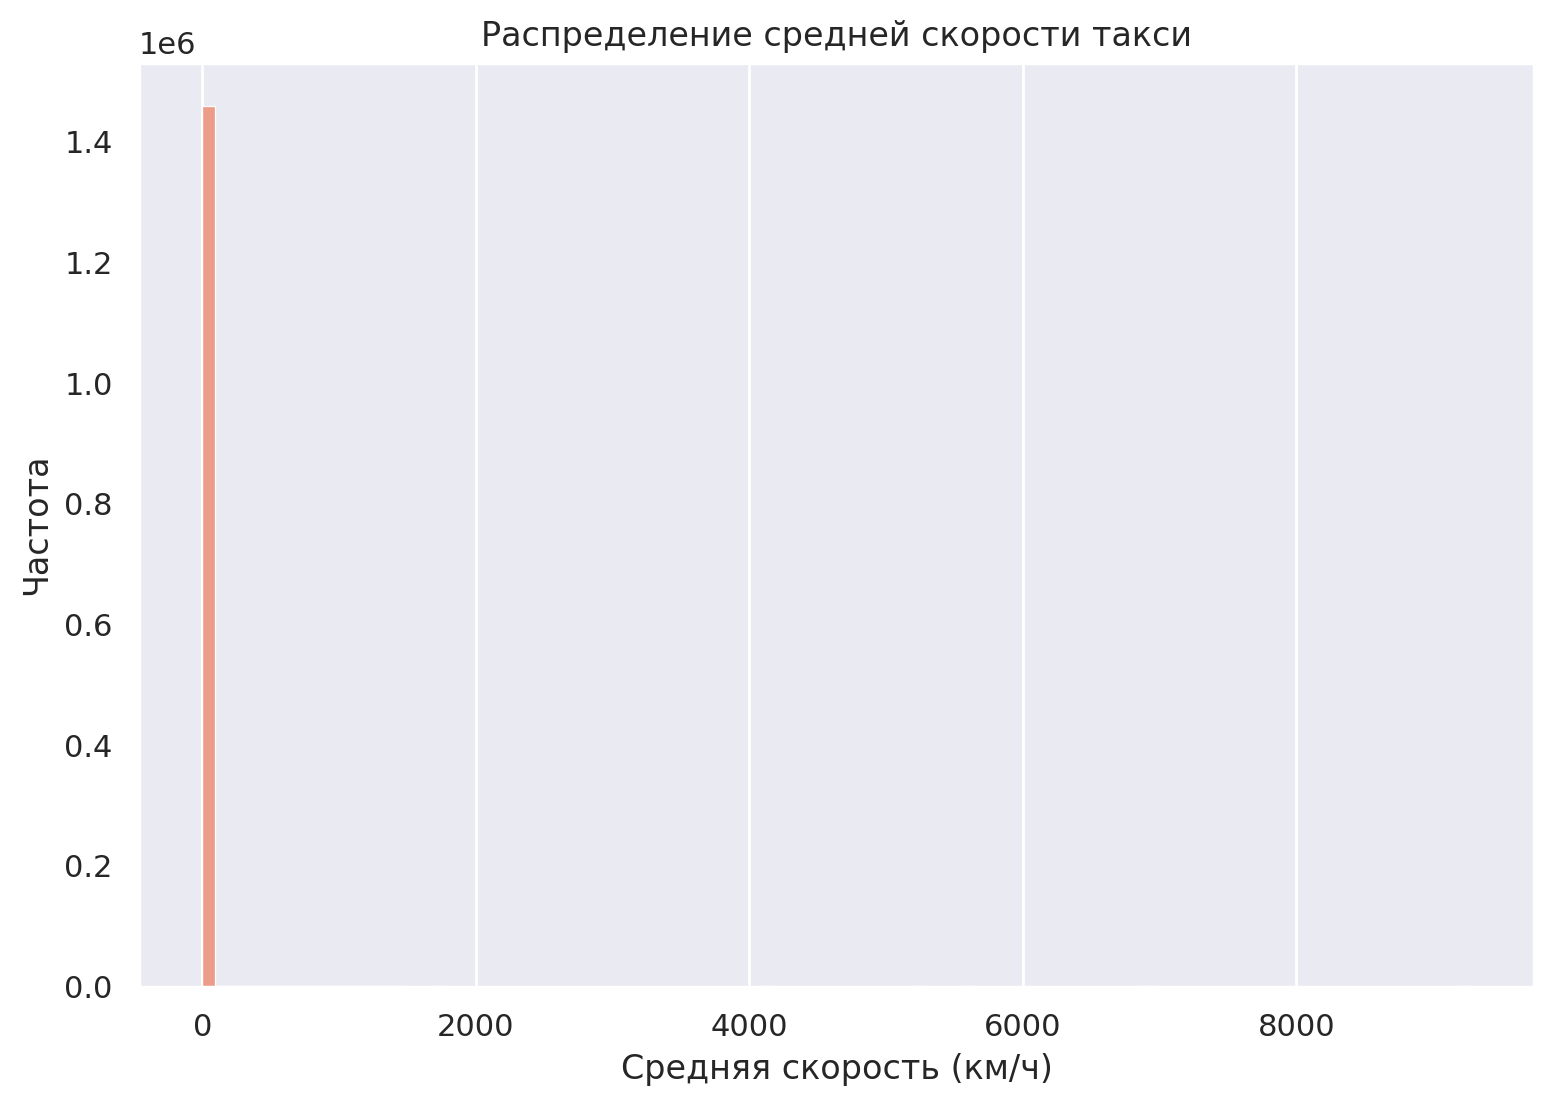

In [43]:
plt.figure(figsize=(9, 6))
df['speed'] = df['haversine'] / df['trip_duration'] * 3600
sns.histplot(df['speed'], bins=100, kde=False, color=plt.cm.coolwarm(0.8))
plt.title('Распределение средней скорости такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

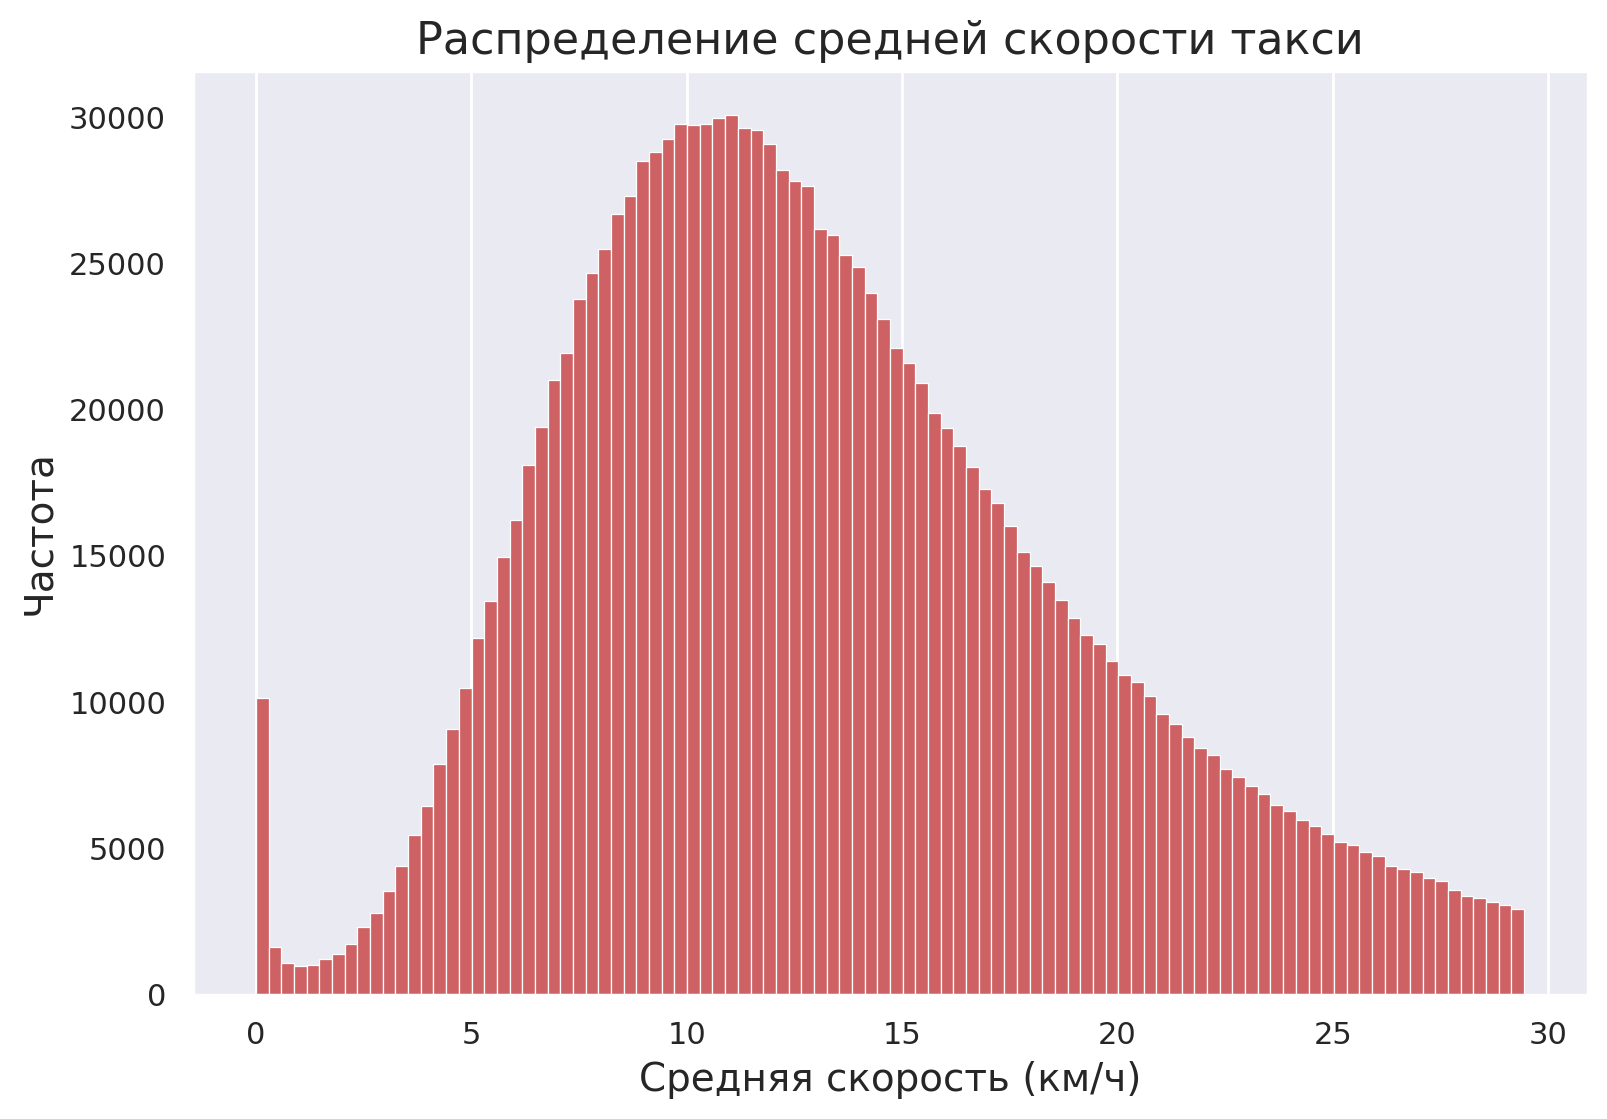

In [44]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
quantile = df['speed'].quantile(0.95)
reasonable_speed = df[df['speed'] <= quantile]
plt.figure(figsize=(9, 6))
sns.histplot(reasonable_speed['speed'], bins=100, kde=False, color=plt.cm.coolwarm(0.95))
plt.title('Распределение средней скорости такси', fontsize=16)
plt.xlabel('Средняя скорость (км/ч)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(axis='y')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

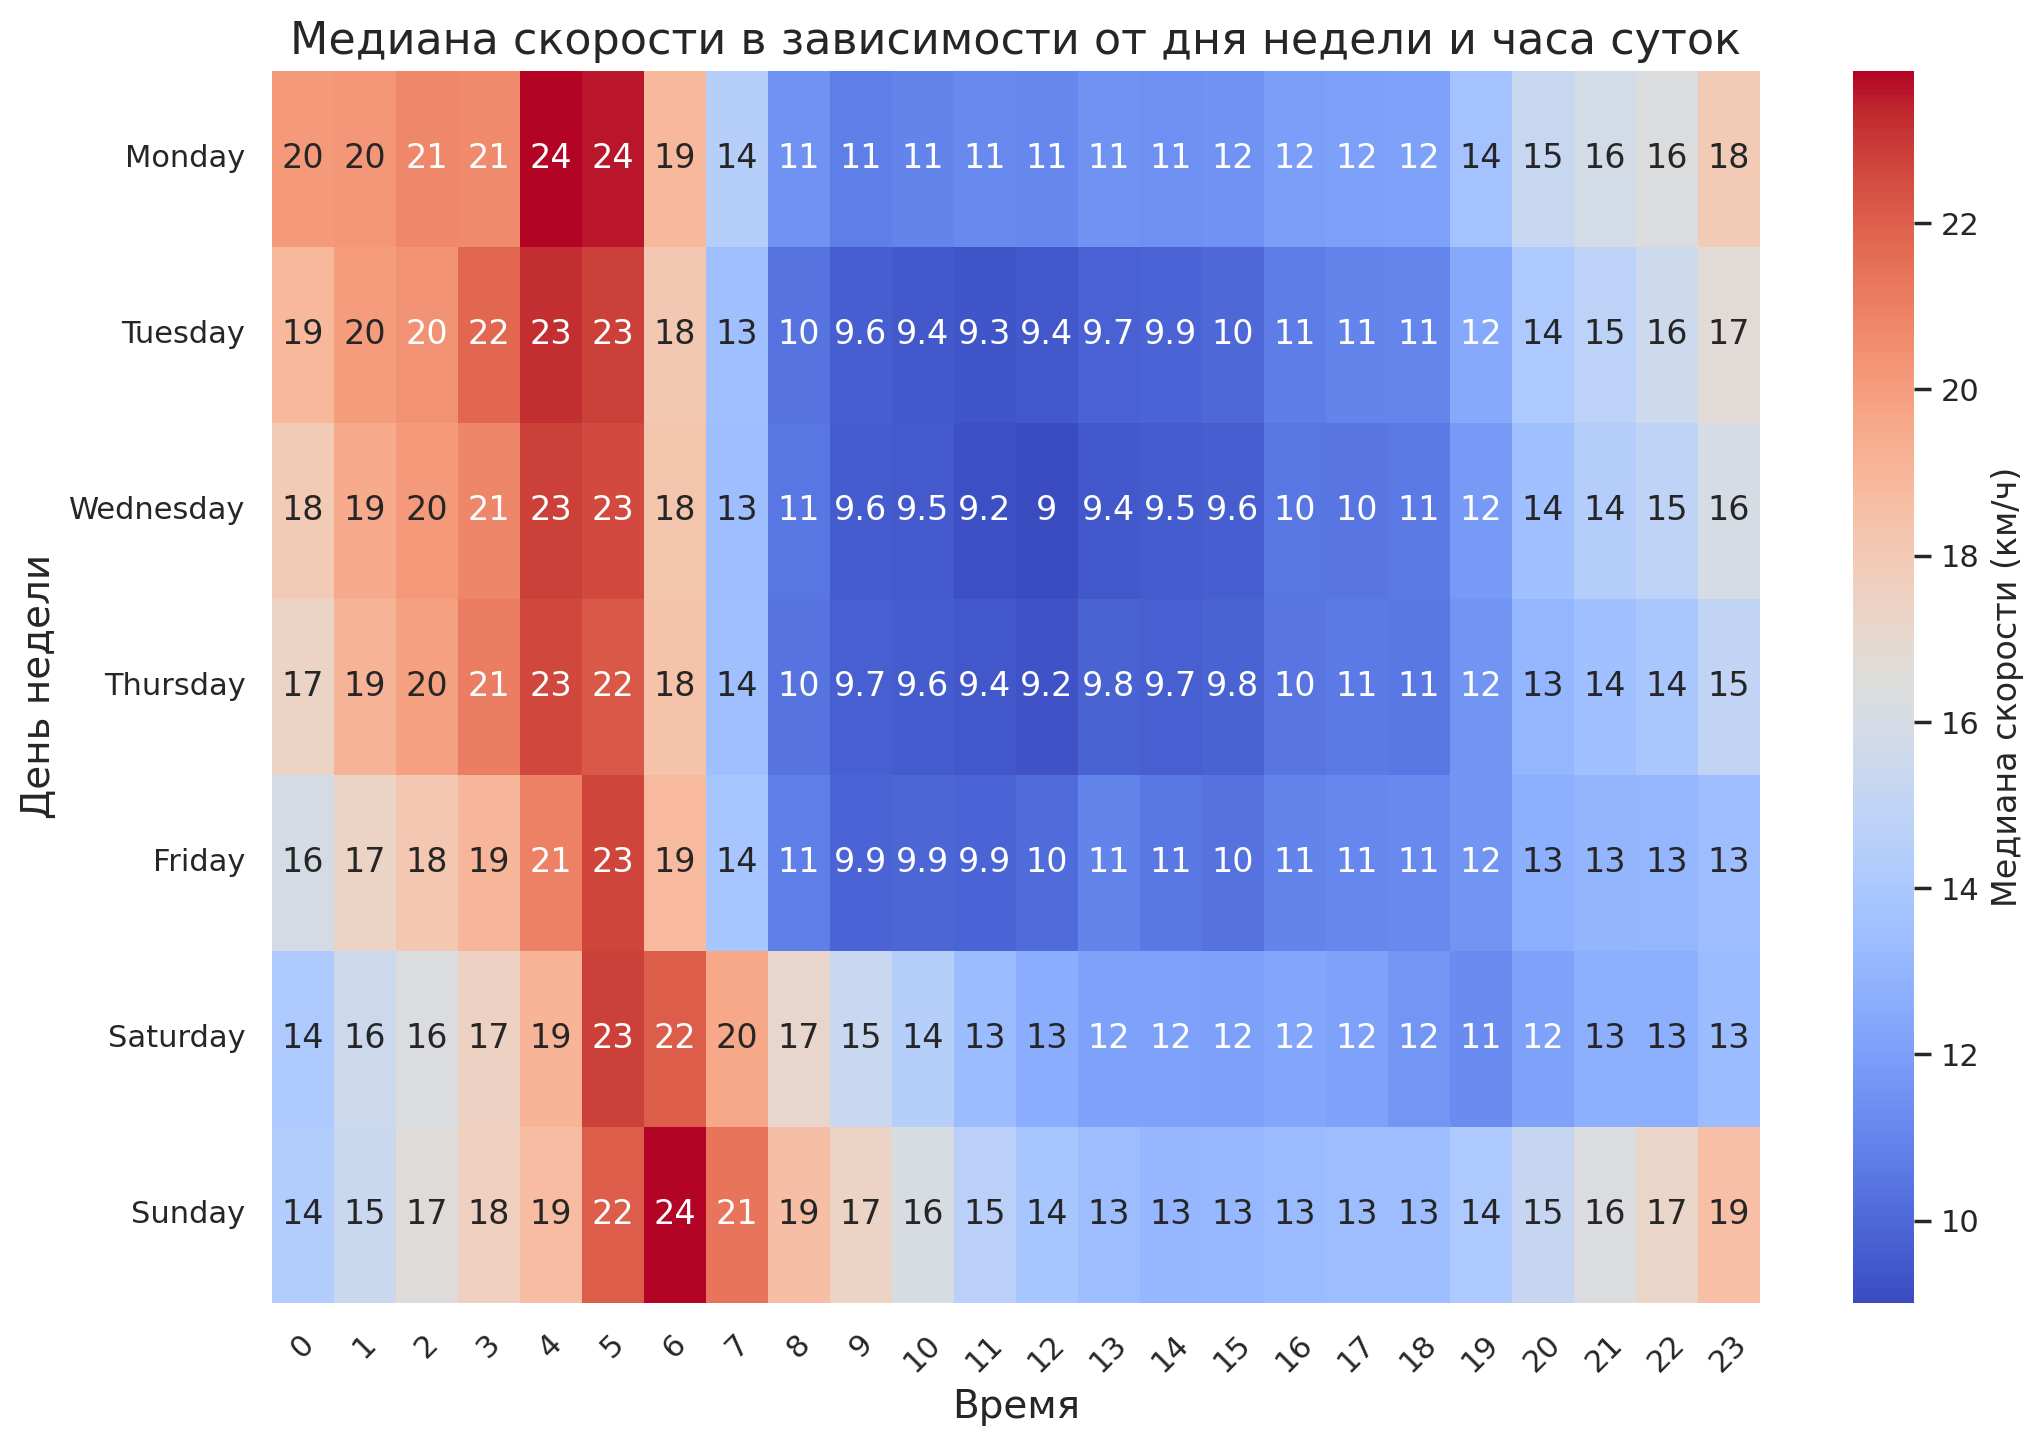

In [45]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
median_speed = df.groupby(['day_of_week', 'hour'])['speed'].median().reset_index()

res_table = median_speed.pivot(index='day_of_week', columns='hour', values='speed')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
res_table = res_table.reindex(ordered_days)

plt.figure(figsize=(12, 8))
sns.heatmap(res_table, cmap="coolwarm", annot=True, cbar_kws={'label': 'Медиана скорости (км/ч)'})
plt.title('Медиана скорости в зависимости от дня недели и часа суток', fontsize=16)
plt.xlabel('Время', fontsize=14)
plt.ylabel('День недели', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = df.drop(columns=['speed'])

In [47]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  new_trip_duration         day month_name  \
0                  N            455           6.122493  2016-03-14      March   
1                  N            663           6.498282  2016-06-12       June   
2                  N           2124           7.661527  2016-01-19    January   
3                  N            429           6.063785  2016-04-06      April   
4                  N            435           6.077642  2016-03-26      March   

  day_of_week  weekday  month  hour  day_of_year  haversine  log_haversine  
0      Monday        0      3    17           74   1.498521       0.915699  
1      Sunday        6      6     0          164   1.805507       1.031584  
2     Tuesday        1      1    11           19   6.385098       1.999464  
3   Wednesday        2      4    19           97   1.485498       0.910473  
4    Saturday        5      3    13           86   1.188588       0.783257

Значение скорости напрямую зпвисит от целевой переменной(временп поездки), следовательно, мы не можем использовать этот признак в дальнейщем при построении регрессии.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Максимальная скорость наблюдается в в период примерно с 4- 6 утра в течение всей недели, минимальная: с 9 до 13 в рабочие дни.



In [48]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#делаем признак - начилие пробок(где можно заметить низкую скорость на Heatmap-графике)
df['traffic'] = (
    (df['weekday'] < 5) &
    (
        ((df['hour'] >= 8) & (df['hour'] < 12)) |
        ((df['hour'] >= 16) & (df['hour'] < 20))
    )
).astype(int)


In [49]:
#теперь для свободных дорог
df['free'] = (
    (
        (df['weekday'] >= 5) &
        (df['hour'] > 4) & (df['hour'] < 8)
    ) |
    (
        (df['weekday'] < 5) &
        (df['hour'] > 0) & (df['hour'] < 6)
    )
).astype(int)


In [50]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  ...  month_name day_of_week weekday  \
0                  N            455  ...       March      Monday       0   
1                  N            663  ...        June      Sunday       6   
2                  N           2124  ...     January     Tuesday       1   
3                  N            429  ...       April   Wednesday       2   
4                  N            435  ...       March    Saturday       5   

  month  hour  day_of_year  haversine  log_haversine  traffic  free  
0     3    17           74   1.498521       0.915699        1     0  
1     6     0          164   1.805507       1.031584        0     0  
2     1    11           19   6.385098       1.999464        1     0  
3     4    19           97   1.485498       0.910473        1     0  
4     3    13           86   1.188588       0.783257        0     0  

[5 rows x 22 columns]

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Необходимые координаты:

1. Аэропорт имени Джона Кеннеди (JFK)
Широта: от 40.6200° N до 40.6700° N
Долгота: от -73.8500° W до -73.8000° W
2. Аэропорт ЛаГардия (LGA)
Широта: от 40.7600° N до 40.7900° N
Долгота: от -73.8900° W до -73.8300° W


Манхэттен
Широта: от 40.7000° N до 40.8000° N
Долгота: от -74.0200° W до -73.9300° W

In [51]:
#для Манхэттена
df['pickup_man'] = (
    (df['pickup_latitude'].between(40.7000, 40.8000)) &
    (df['pickup_longitude'].between(-74.0200, -73.9300))
).astype(int)

df['drop_man'] = (
    (df['dropoff_latitude'].between(40.7000, 40.8000)) &
    (df['dropoff_longitude'].between(-74.0200, -73.9300))
).astype(int)

In [52]:
#для аэропрта Джона Кеннеди (JFK)
df['pickup_airk'] = (
    (df['pickup_latitude'].between(40.620, 40.6700)) &
    (df['pickup_longitude'].between(-73.8500, -73.8000))
).astype(int)

df['drop_airk'] = (
    (df['dropoff_latitude'].between(40.620, 40.6700)) &
    (df['dropoff_longitude'].between(-73.8500, -73.8000))
).astype(int)

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#для аэропрта ЛаГардия (LGA)
df['pickup_airl'] = (
    (df['pickup_latitude'].between(40.7600, 40.7900)) &
    (df['pickup_longitude'].between(-73.8900, -73.8300))
).astype(int)

df['drop_airl'] = (
    (df['dropoff_latitude'].between(40.7600, 40.7900)) &
    (df['dropoff_longitude'].between(-73.8900, -73.8300))
).astype(int)


In [54]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  ...  haversine log_haversine traffic  \
0                  N            455  ...   1.498521      0.915699       1   
1                  N            663  ...   1.805507      1.031584       0   
2                  N           2124  ...   6.385098      1.999464       1   
3                  N            429  ...   1.485498      0.910473       1   
4                  N            435  ...   1.188588      0.783257       0   

  free  pickup_man  drop_man  pickup_airk  drop_airk  pickup_airl  drop_airl  
0    0           1         1            0          0            0          0  
1    0           1         1            0          0            0          0  
2    0           1         1            0          0            0          0  
3    0           1         1            0          0            0          0  
4    0           1         1            0          0            0          0  

[5 rows x 28 columns]

In [55]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'new_trip_duration', 'day', 'month_name', 'day_of_week', 'weekday',
       'month', 'hour', 'day_of_year', 'haversine', 'log_haversine', 'traffic',
       'free', 'pickup_man', 'drop_man', 'pickup_airk', 'drop_airk',
       'pickup_airl', 'drop_airl'],
      dtype='object')

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
columns = ['traffic', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']


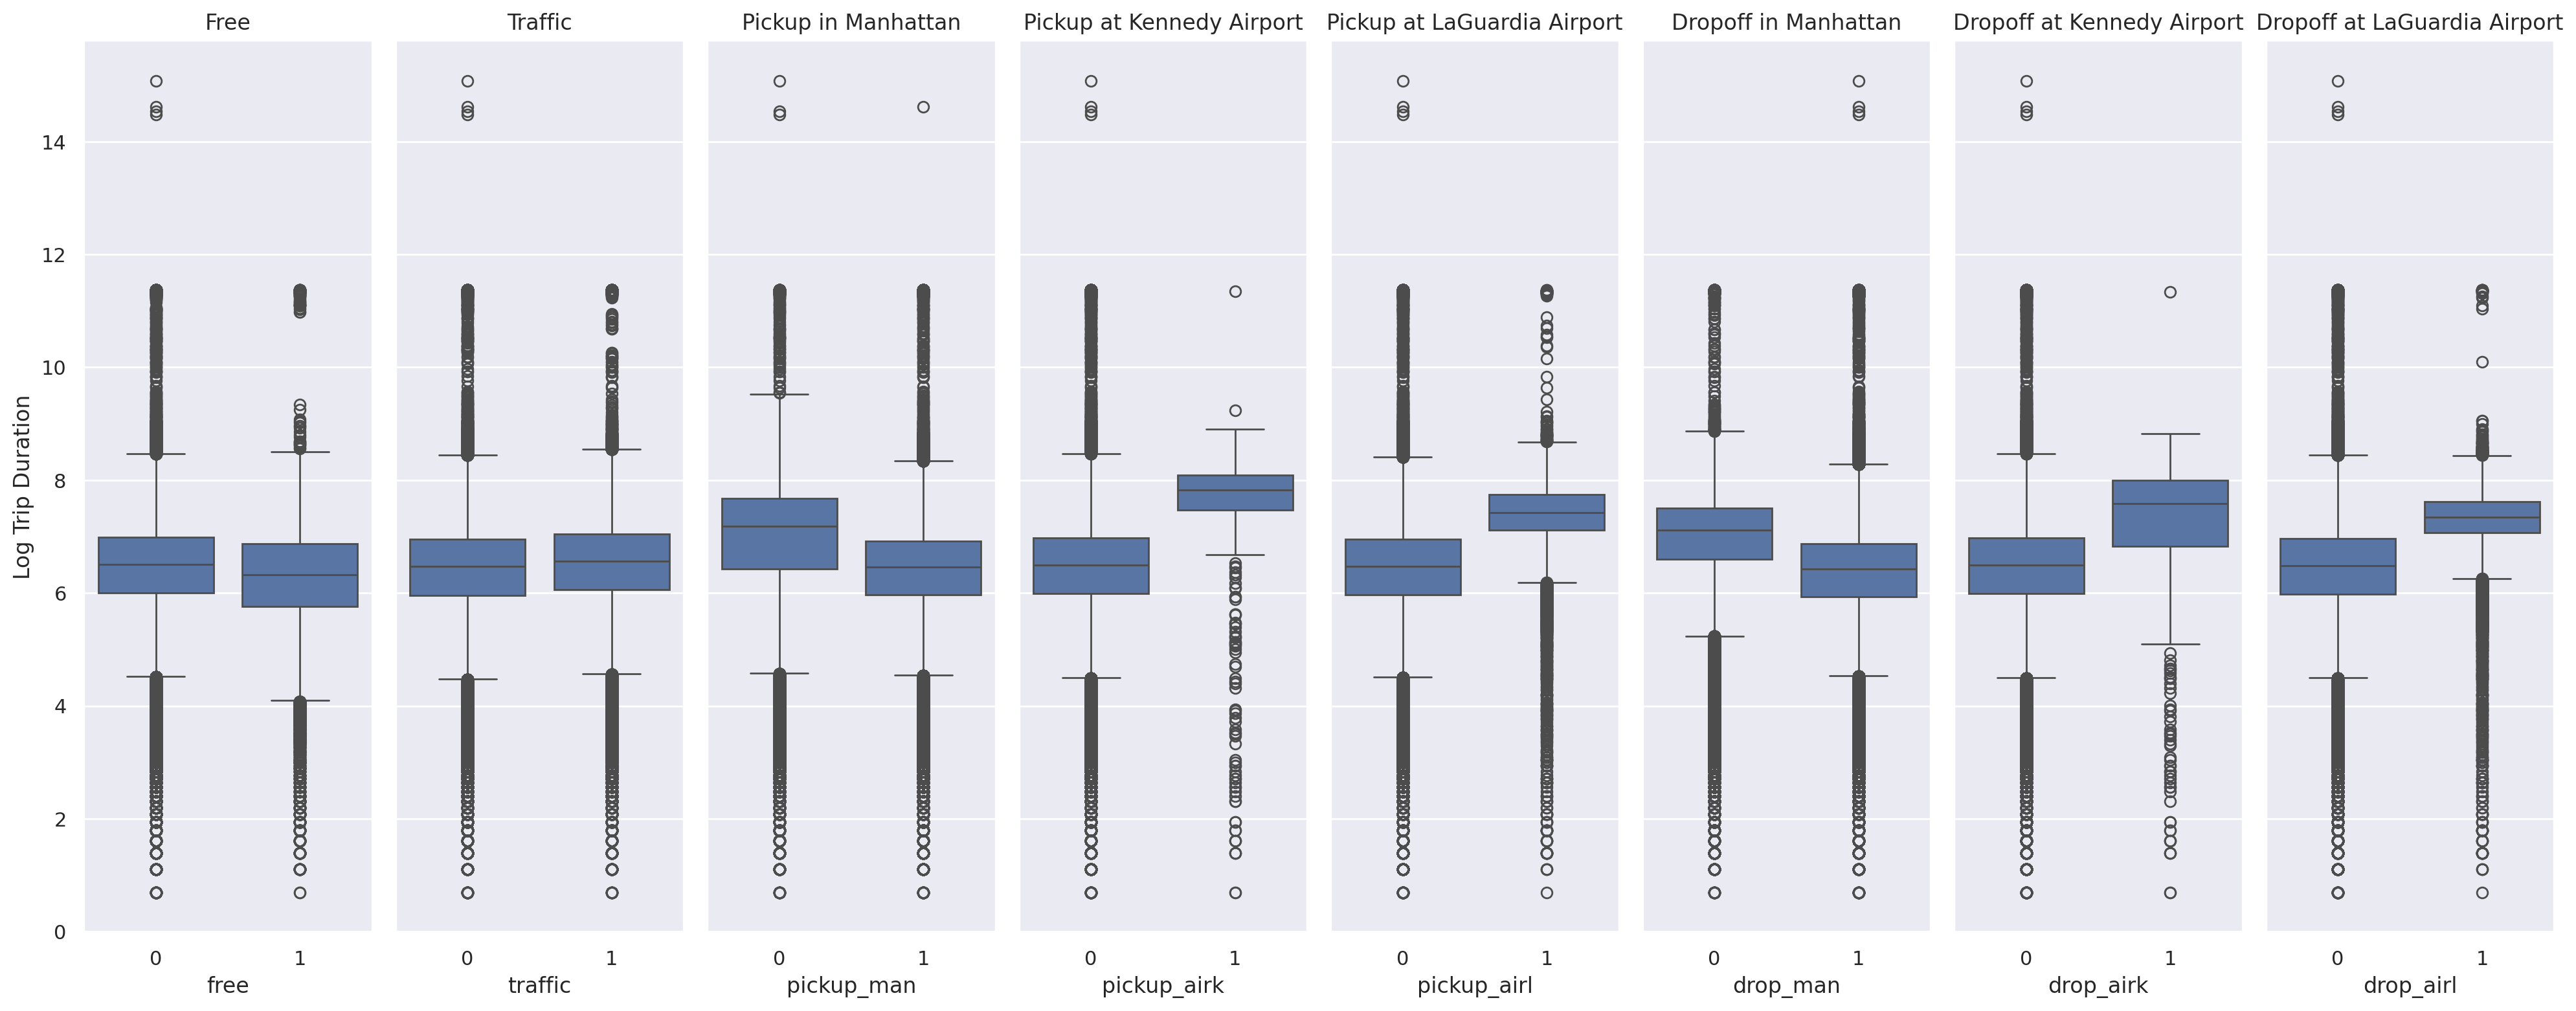

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.rcParams['figure.figsize'] = (20, 8)
fig, axes = plt.subplots(1, 8, sharey=True)
columns = ['free','traffic', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man', 'drop_airk', 'drop_airl']
titles = [
    'Free',
    "Traffic",
    "Pickup in Manhattan",
    "Pickup at Kennedy Airport",
    "Pickup at LaGuardia Airport",
    "Dropoff in Manhattan",
    "Dropoff at Kennedy Airport",
    "Dropoff at LaGuardia Airport"
]


for ax, col, title in zip(axes, columns, titles):
    sns.boxplot(x=col, y="new_trip_duration", data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    if ax == axes[0]:
        ax.set_ylabel("Log Trip Duration")


plt.tight_layout()
plt.show()


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Из графиков видно, что признаки, связанные с пробками, не особо полезные, так как  не показывают значительных отличий по медианному времени поездок. Остальные признаки, наоборот, полезные.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [58]:
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles, Polygon, CircleMarker, LayerGroup
from scipy.spatial.distance import cdist

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def show_map(self):
        self.walls, self.circles_loc = self._fit()
        _map = Map(center=((self.location_mh[:, 0]).mean(), (self.location_mh[:, 1]).mean()),
                   zoom=11, basemap=basemaps.Esri.NatGeoWorldMap)

        circles = [(CircleMarker(location=(lat, long), fill_color='red',
                                 fill_opacity=1, radius=5, stroke=False)) for lat, long in self.circles_loc]
        polygons = [(Polygon(locations=self.create_box_(loc), fill_opacity=0)) for loc in self.circles_loc]

        circles_layer = LayerGroup(layers=circles)
        polygon_layer = LayerGroup(layers=polygons)

        _map.add_layer(circles_layer)
        _map.add_layer(polygon_layer)

        return _map

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

        return self.walls, self.circles_loc
    def get_sector_idx(self, X):
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                           a.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                            a.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        return pickup_idx, dropoff_idx

    def transform(self, X):
        return self.get_sector_idx(X)

In [60]:
mh = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])

a = MapGridTransformer(mh, 5, 4)


In [61]:
a._fit()
df['pickup_zona'], df['dropoff_zona'] = a.transform(df)[0], a.transform(df)[1]



In [62]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  ...  traffic free pickup_man drop_man  \
0                  N            455  ...        1    0          1        1   
1                  N            663  ...        0    0          1        1   
2                  N           2124  ...        1    0          1        1   
3                  N            429  ...        1    0          1        1   
4                  N            435  ...        0    0          1        1   

   pickup_airk  drop_airk  pickup_airl  drop_airl  pickup_zona  dropoff_zona  
0            0          0            0          0           13            14  
1            0          0            0          0            5             4  
2            0          0            0          0           13             0  
3            0          0            0          0            0             0  
4            0          0            0          0           -1            18  

[5 rows x 30 columns]

https://ru.stackoverflow.com/questions/1161594/Разбиение-области-на-ячейки-и-присвоение-меток-с-началом-и-концом отсюда взята идея

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [63]:
snow_dates = pd.to_datetime(['2016-01-23', '2016-01-24']).date
memorial_day_date = pd.to_datetime('2016-05-30').date()
df['snow'] = df['pickup_datetime'].dt.date.isin(snow_dates).astype(int)
df['memorial_day'] = (df['pickup_datetime'].dt.date == memorial_day_date).astype(int)

In [64]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [65]:
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          2 2016-05-03 09:03:08                2   
178550   id0586605          1 2016-01-01 16:40:51                1   
551460   id0467144          1 2016-04-24 13:57:03                1   
1434271  id0989010          2 2016-01-10 17:03:47                1   
1173610  id0580742          1 2016-02-25 17:37:36                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  pickup_man  \
1011257         40.763680                  N            844  ...           1   
178550          40.788933                  N           1001  ...           1   
551460          40.768608                  N           1048  ...           1   
1434271         40.752213                  N            784  ...           1   
1173610         40.789875                  N            732  ...           1   

        drop_man pickup_airk drop_airk  pickup_airl  drop_airl  pickup_zona  \
1011257        1           0         0            0          0            9   
178550         1           0         0            0          0            9   
551460         0           0         0            0          1           19   
1434271        1           0         0            0          0            5   
1173610        1           0         0            0          0           14   

         dropoff_zona  snow  memorial_day  
1011257            13     0             0  
178550             18     0             0  
551460             -1     0             0  
1434271             9     0             0  
1173610            17     0             0  

[5 rows x 32 columns]

In [66]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'new_trip_duration', 'day', 'month_name', 'day_of_week', 'weekday',
       'month', 'hour', 'day_of_year', 'haversine', 'log_haversine', 'traffic',
       'free', 'pickup_man', 'drop_man', 'pickup_airk', 'drop_airk',
       'pickup_airl', 'drop_airl', 'pickup_zona', 'dropoff_zona', 'snow',
       'memorial_day'],
      dtype='object')

In [67]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train['log_haversine'],train[second]], axis=1)
y_train = train['new_trip_duration']

X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test,  test['log_haversine'],test[second]], axis=1)
y_test = test['new_trip_duration']
from sklearn.preprocessing import StandardScaler
#числовой признак отмасштабируем(признак - 'log_haversine')
scaler = StandardScaler()
X_train['log_haversine_scaled'] = scaler.fit_transform(X_train[['log_haversine']])
X_test['log_haversine_scaled'] = scaler.transform(X_test[['log_haversine']])

print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())


Количество NaN в y_train: 0


In [68]:
ans = Ridge()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2289
RMSE = 0.4784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


После добавления новых признаков MSE стало значительно меньшеБ следовательно, стало лучше

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

 vendor_id:

 разные таксисты имеют разный опыт и уровень вождения, из-за чего может меняться скорость и, следовательно, время поездки

 passenger_count:

 количесво пасажиров может влиять на длительность поездки, так как чем больше людей, тем борльше останов они захотят сделать

 store_and_fwd_flag:

 проблемы с сетью и подключением к серверу так же может увеличивать время поездки

In [69]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("Уникальных значений в vendor_id:", df['vendor_id'].nunique())
print("Уникальных значений в passenger_count:", df['passenger_count'].nunique())
print("Уникальных значений в store_and_fwd_flag:", df['store_and_fwd_flag'].nunique())


Уникальных значений в vendor_id: 2
Уникальных значений в passenger_count: 10
Уникальных значений в store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

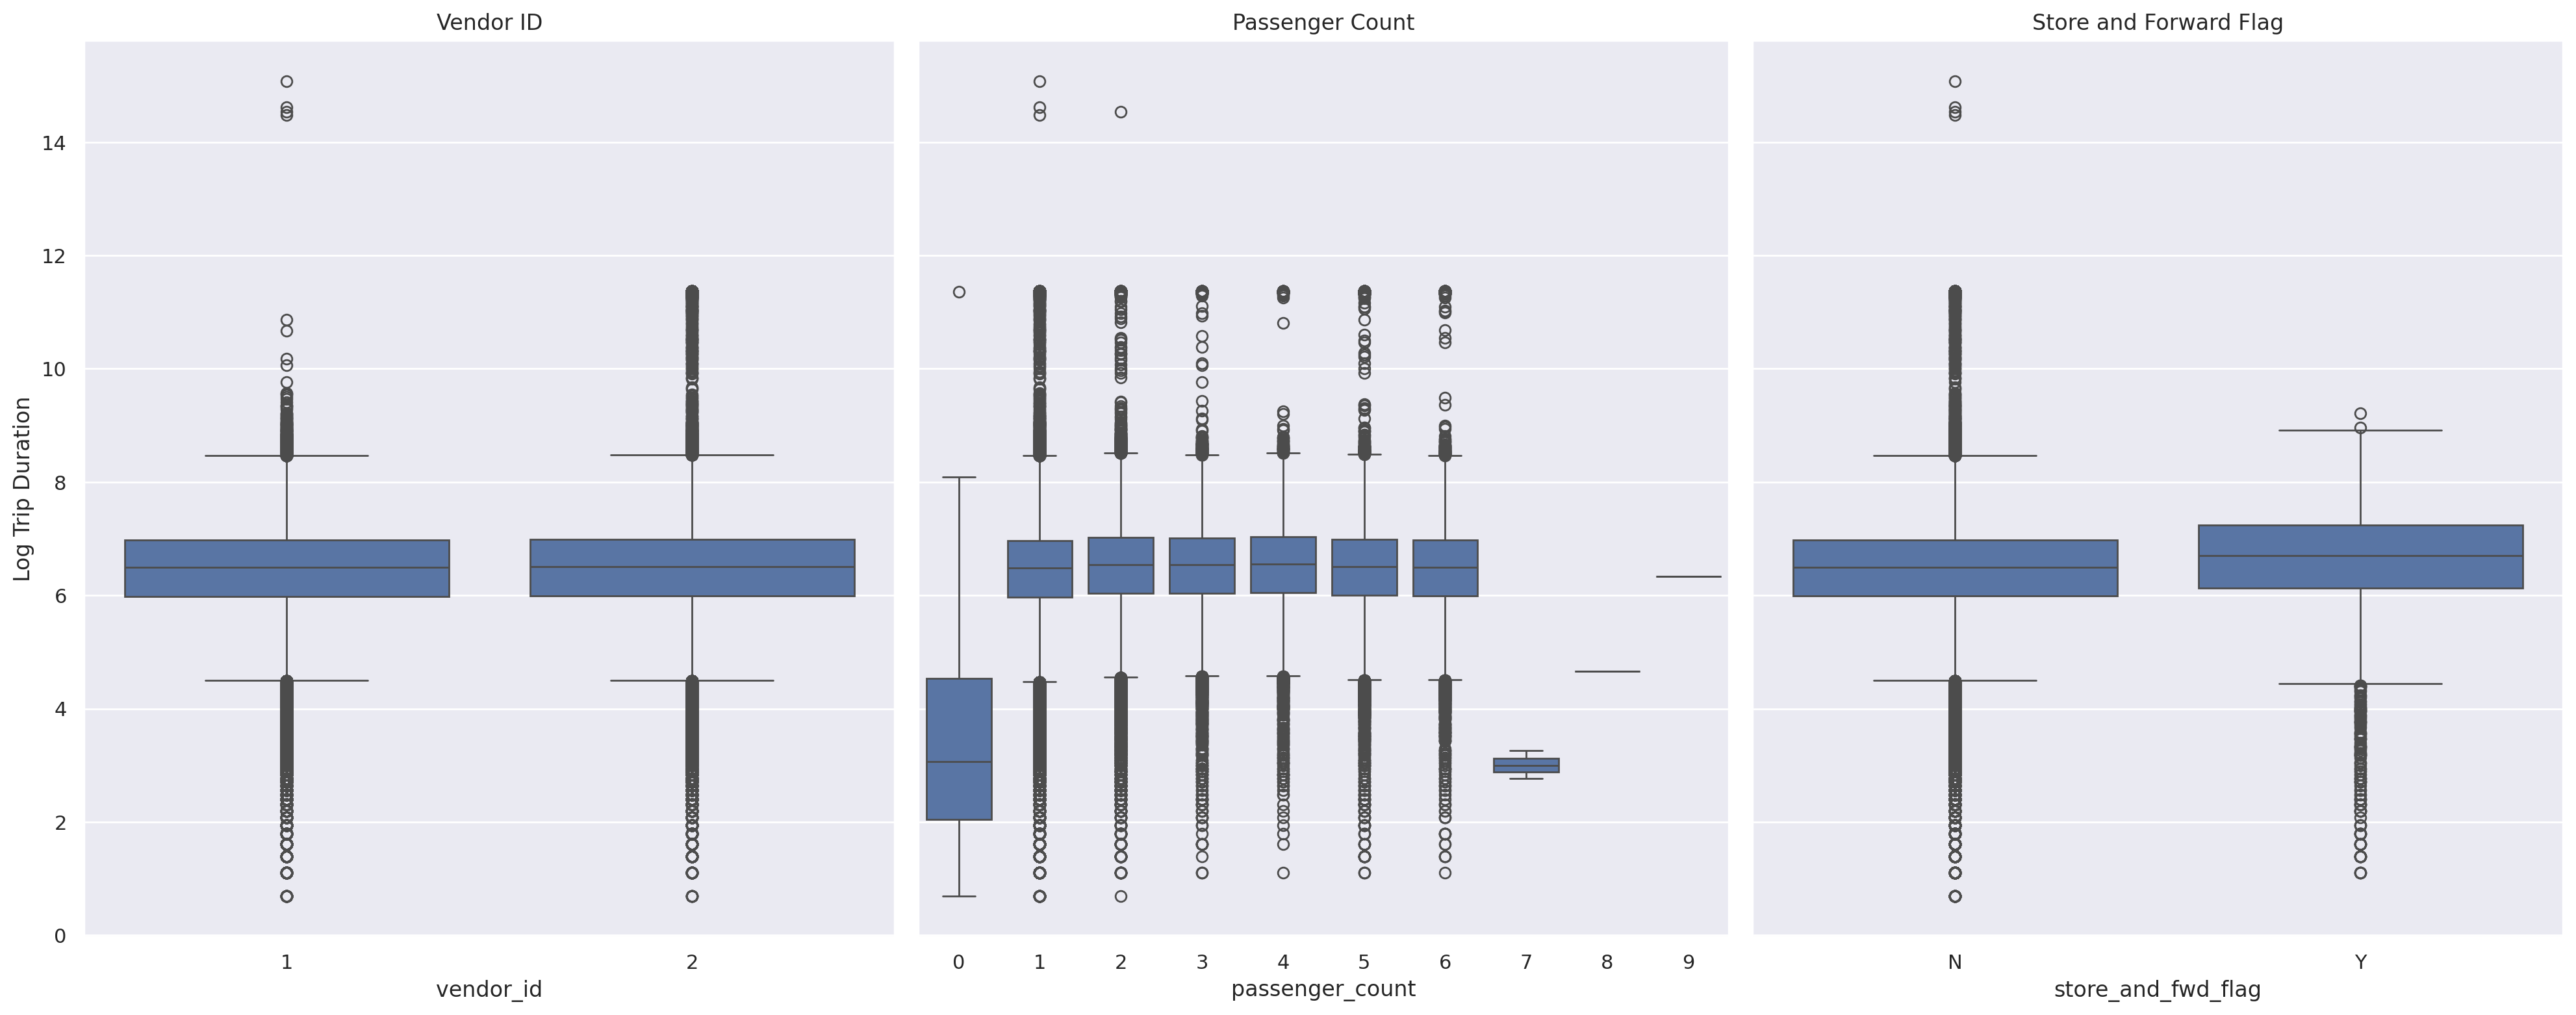

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.rcParams['figure.figsize'] = (20, 8)

fig, axes = plt.subplots(1, 3, sharey=True)
columns = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']
titles = [
    'Vendor ID',
    'Passenger Count',
    'Store and Forward Flag'

]
for ax, col, title in zip(axes, columns, titles):
    sns.boxplot(x=col, y="new_trip_duration", data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(col)
    if ax == axes[0]:
        ax.set_ylabel("Log Trip Duration")

plt.tight_layout()
plt.show()


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [71]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [72]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          1 2016-03-14 17:24:55                1   
1  id2377394          0 2016-06-12 00:43:35                1   
2  id3858529          1 2016-01-19 11:35:24                1   
3  id3504673          1 2016-04-06 19:32:31                1   
4  id2181028          1 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   store_and_fwd_flag  trip_duration  ...  pickup_man drop_man pickup_airk  \
0                   0            455  ...           1        1           0   
1                   0            663  ...           1        1           0   
2                   0           2124  ...           1        1           0   
3                   0            429  ...           1        1           0   
4                   0            435  ...           1        1           0   

  drop_airk  pickup_airl  drop_airl  pickup_zona  dropoff_zona  snow  \
0         0            0          0           13            14     0   
1         0            0          0            5             4     0   
2         0            0          0           13             0     0   
3         0            0          0            0             0     0   
4         0            0          0           -1            18     0   

   memorial_day  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 32 columns]

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Из графиков "ящики с усами" видно, что признаки vendor_id и store_and_fwd_flag не будут иметь сильного влияния. Признак passenger_count может повлиять, наример, если написано, что ноль пассажиров или их очень много (больше 6).

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [74]:
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1011257  id2209155          1 2016-05-03 09:03:08                2   
178550   id0586605          0 2016-01-01 16:40:51                1   
551460   id0467144          0 2016-04-24 13:57:03                1   
1434271  id0989010          1 2016-01-10 17:03:47                1   
1173610  id0580742          0 2016-02-25 17:37:36                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  pickup_man  \
1011257         40.763680                   0            844  ...           1   
178550          40.788933                   0           1001  ...           1   
551460          40.768608                   0           1048  ...           1   
1434271         40.752213                   0            784  ...           1   
1173610         40.789875                   0            732  ...           1   

        drop_man pickup_airk drop_airk  pickup_airl  drop_airl  pickup_zona  \
1011257        1           0         0            0          0            9   
178550         1           0         0            0          0            9   
551460         0           0         0            0          1           19   
1434271        1           0         0            0          0            5   
1173610        1           0         0            0          0           14   

         dropoff_zona  snow  memorial_day  
1011257            13     0             0  
178550             18     0             0  
551460             -1     0             0  
1434271             9     0             0  
1173610            17     0             0  

[5 rows x 32 columns]

In [75]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'new_trip_duration', 'day', 'month_name', 'day_of_week', 'weekday',
       'month', 'hour', 'day_of_year', 'haversine', 'log_haversine', 'traffic',
       'free', 'pickup_man', 'drop_man', 'pickup_airk', 'drop_airk',
       'pickup_airl', 'drop_airl', 'pickup_zona', 'dropoff_zona', 'snow',
       'memorial_day'],
      dtype='object')

In [76]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl', 'vendor_id', 'store_and_fwd_flag']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train[['log_haversine', 'passenger_count']],train[second]], axis=1)
y_train = train['new_trip_duration']


X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test,  test[['log_haversine', 'passenger_count']],test[second]], axis=1)
y_test = test['new_trip_duration']
from sklearn.preprocessing import StandardScaler
#числовые признаки отмасштабируем(признаки - 'log_haversine', 'passenger_count')
scaler = StandardScaler()
X_train['log_haversine_scaled'] = scaler.fit_transform(X_train[['log_haversine']])
X_test['log_haversine_scaled'] = scaler.transform(X_test[['log_haversine']])

scaler = StandardScaler()
X_train['passenger_count_scaled'] = scaler.fit_transform(X_train[['passenger_count']])
X_test['passenger_count_scaled'] = scaler.transform(X_test[['passenger_count']])


print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())

Количество NaN в y_train: 0


In [77]:
ans = Ridge()
ans.fit(X_train, y_train)
train_predictions = ans.predict(X_train)
train['resis'] = (y_train - train_predictions) ** 2


result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2287
RMSE = 0.4782


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

У нас было MSE = 0.2289, стало на 0.0002 меньше. признаки не являются сильными, их лучше будет убрать, так как они не сильно влияют на модель, могут привести к переобучению. Можно оставить только количесво пассажиров

In [78]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [79]:
train = train.drop(columns=['vendor_id', 'store_and_fwd_flag'])

In [80]:
test = test.drop(columns=['vendor_id', 'store_and_fwd_flag'])


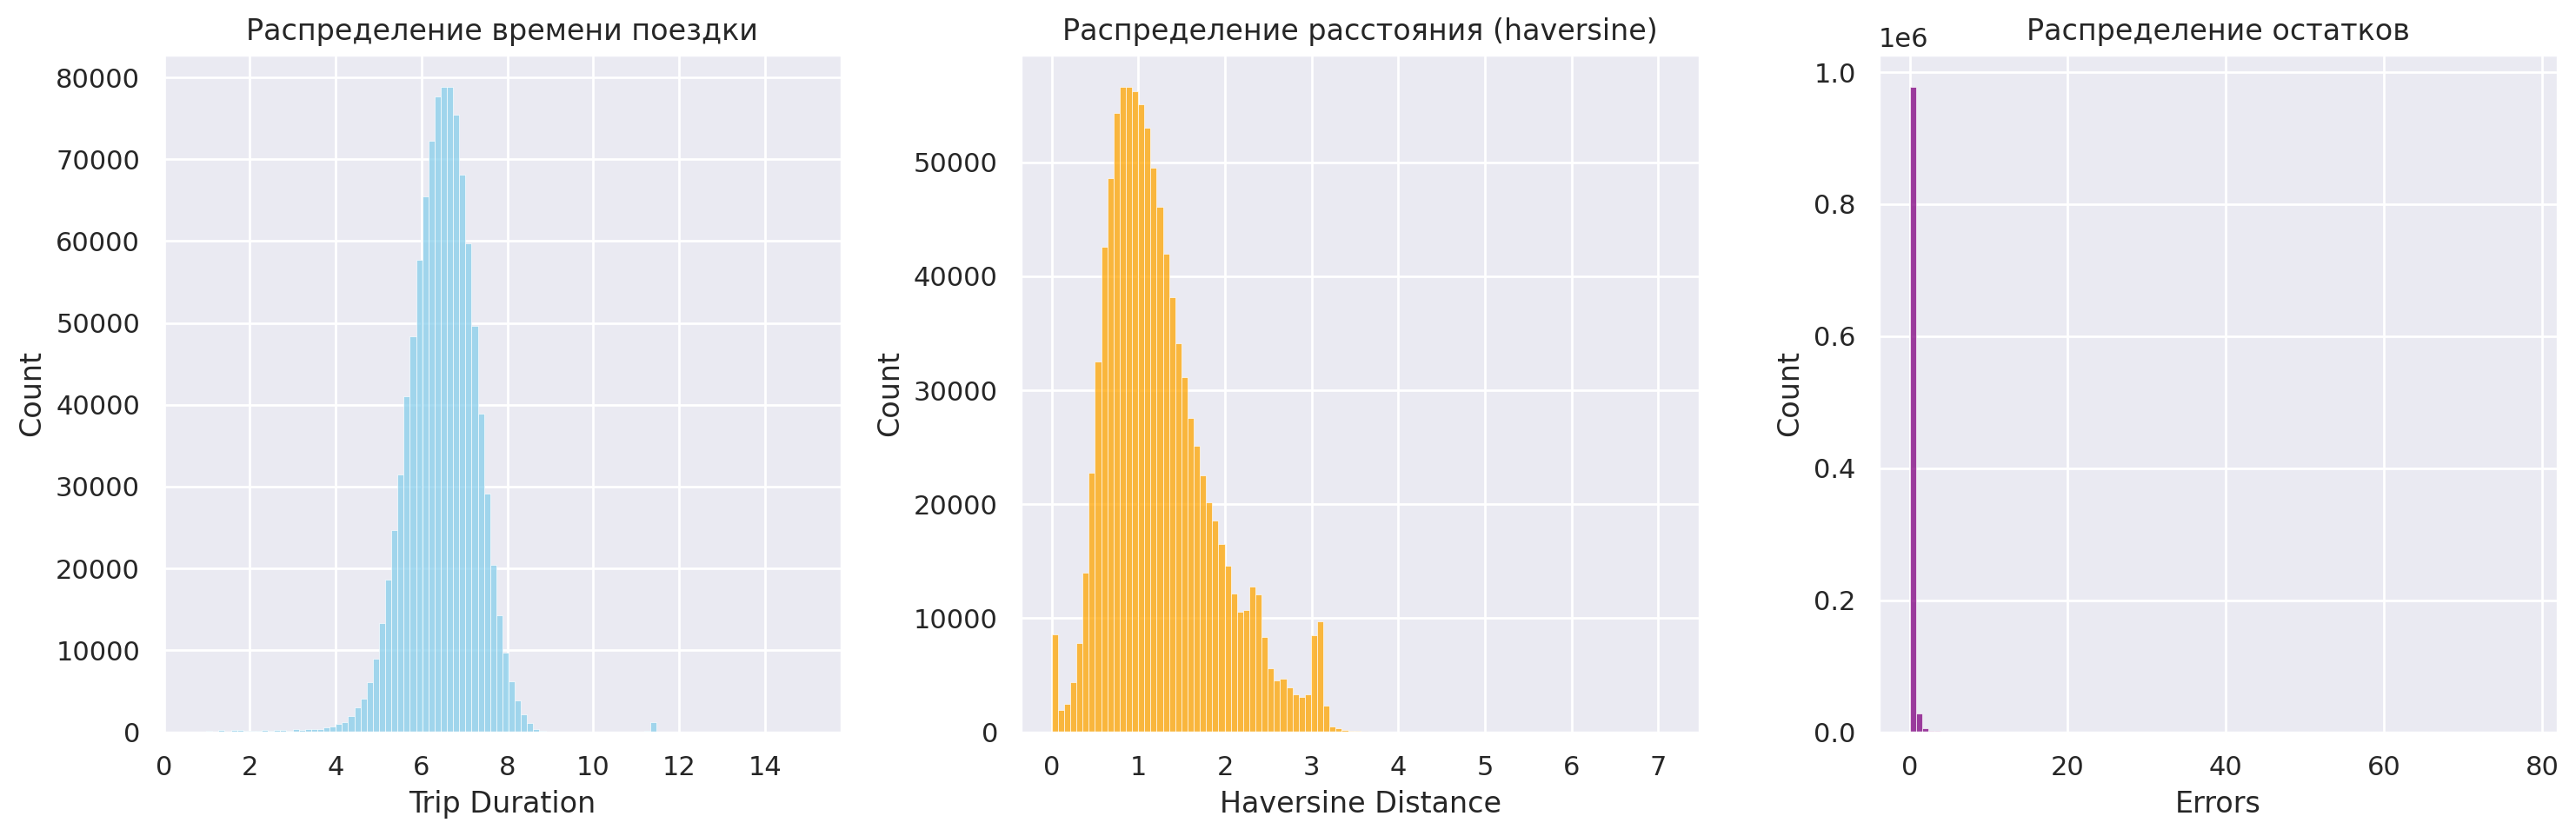

In [81]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(train['new_trip_duration'], bins=100, color='skyblue')
plt.xlabel('Trip Duration')
plt.title('Распределение времени поездки')

plt.subplot(1, 3, 2)
sns.histplot(train['log_haversine'], bins=100, color='orange')
plt.xlabel('Haversine Distance')
plt.title('Распределение расстояния (haversine)')


plt.subplot(1, 3, 3)
sns.histplot(train['resis'], bins=100, color='purple')
plt.title('Распределение остатков')
plt.xlabel('Errors')

plt.tight_layout()
plt.show()


In [82]:
train = train[train['resis'] < train['resis'].quantile(0.95)]

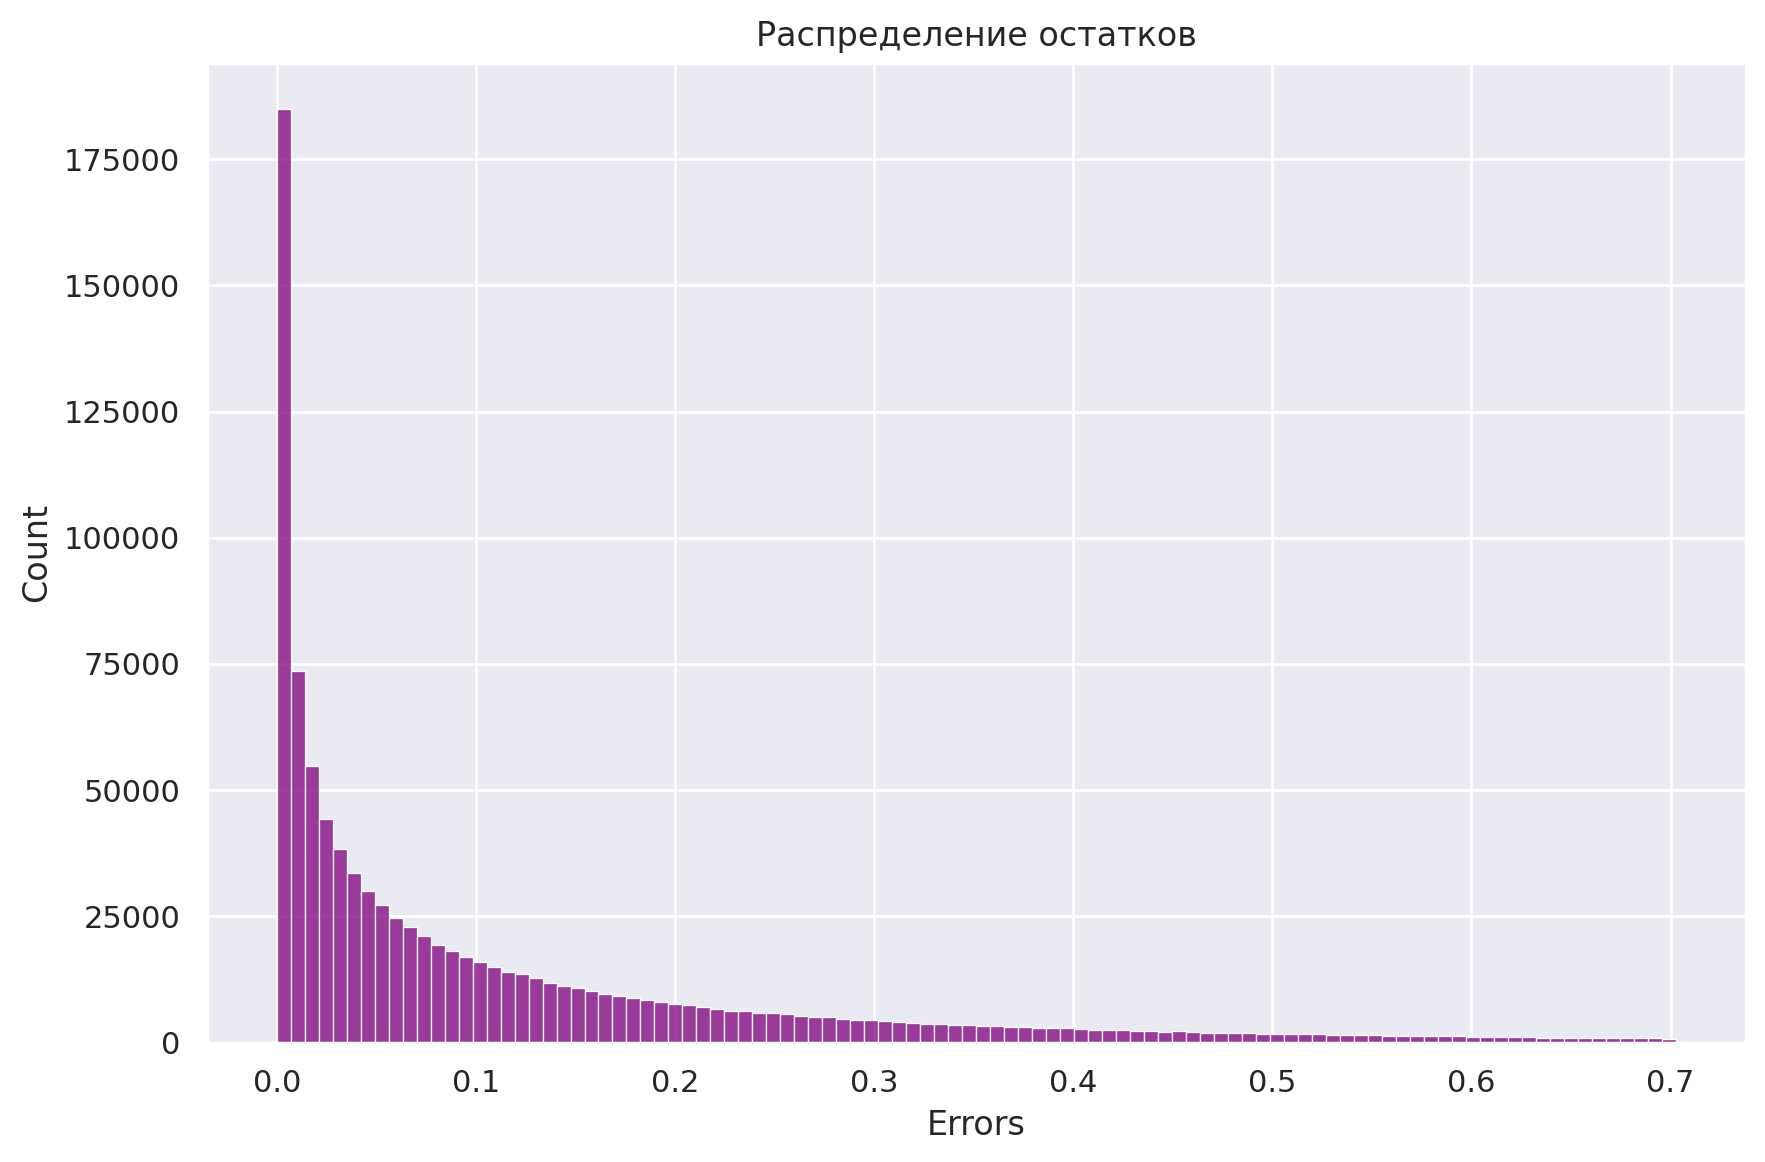

In [83]:
plt.figure(figsize=(9, 6))
sns.histplot(train['resis'], bins=100, color='purple')
plt.title('Распределение остатков')
plt.xlabel('Errors')

plt.tight_layout()
plt.show()

In [84]:
train = train[(train['new_trip_duration'] > 3.5) & (train['new_trip_duration'] < 10)]

Text(0.5, 1.0, 'Распределение времени поездки')

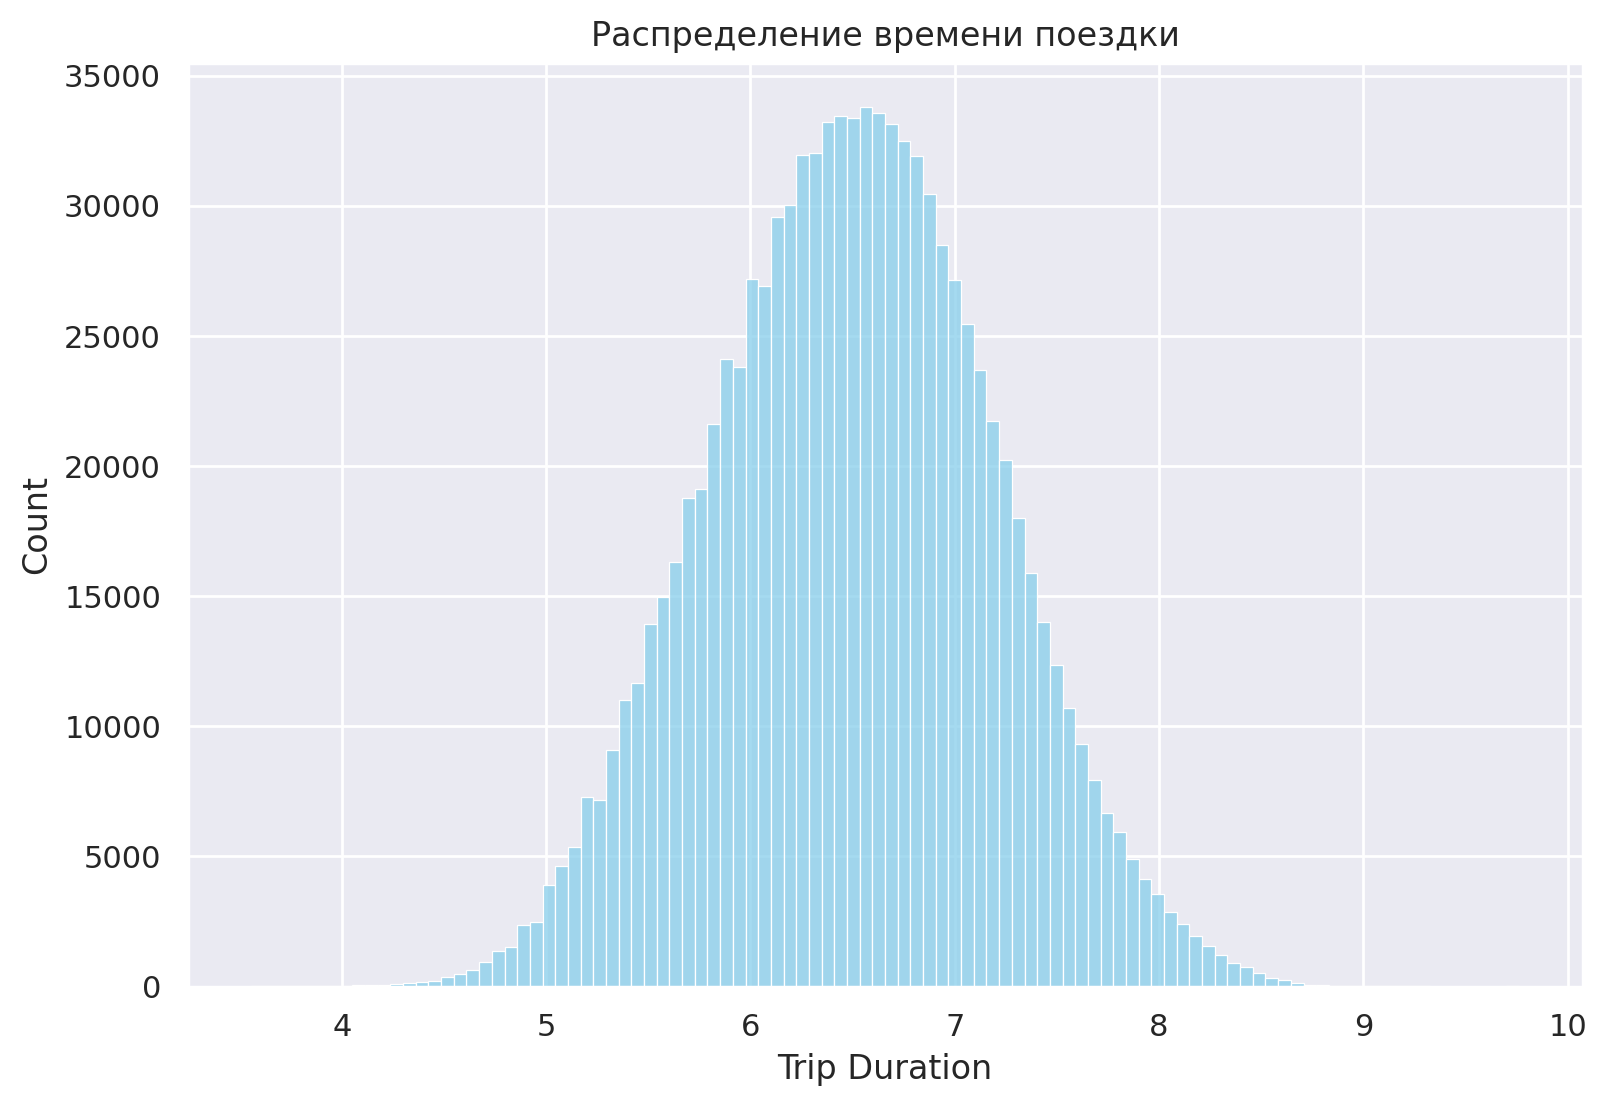

In [85]:
plt.figure(figsize=(9, 6))
sns.histplot(train['new_trip_duration'], bins=100, color='skyblue')
plt.xlabel('Trip Duration')
plt.title('Распределение времени поездки')

In [86]:
train = train[train['log_haversine'] < 3]


Text(0.5, 1.0, 'Распределение расстояния (haversine)')

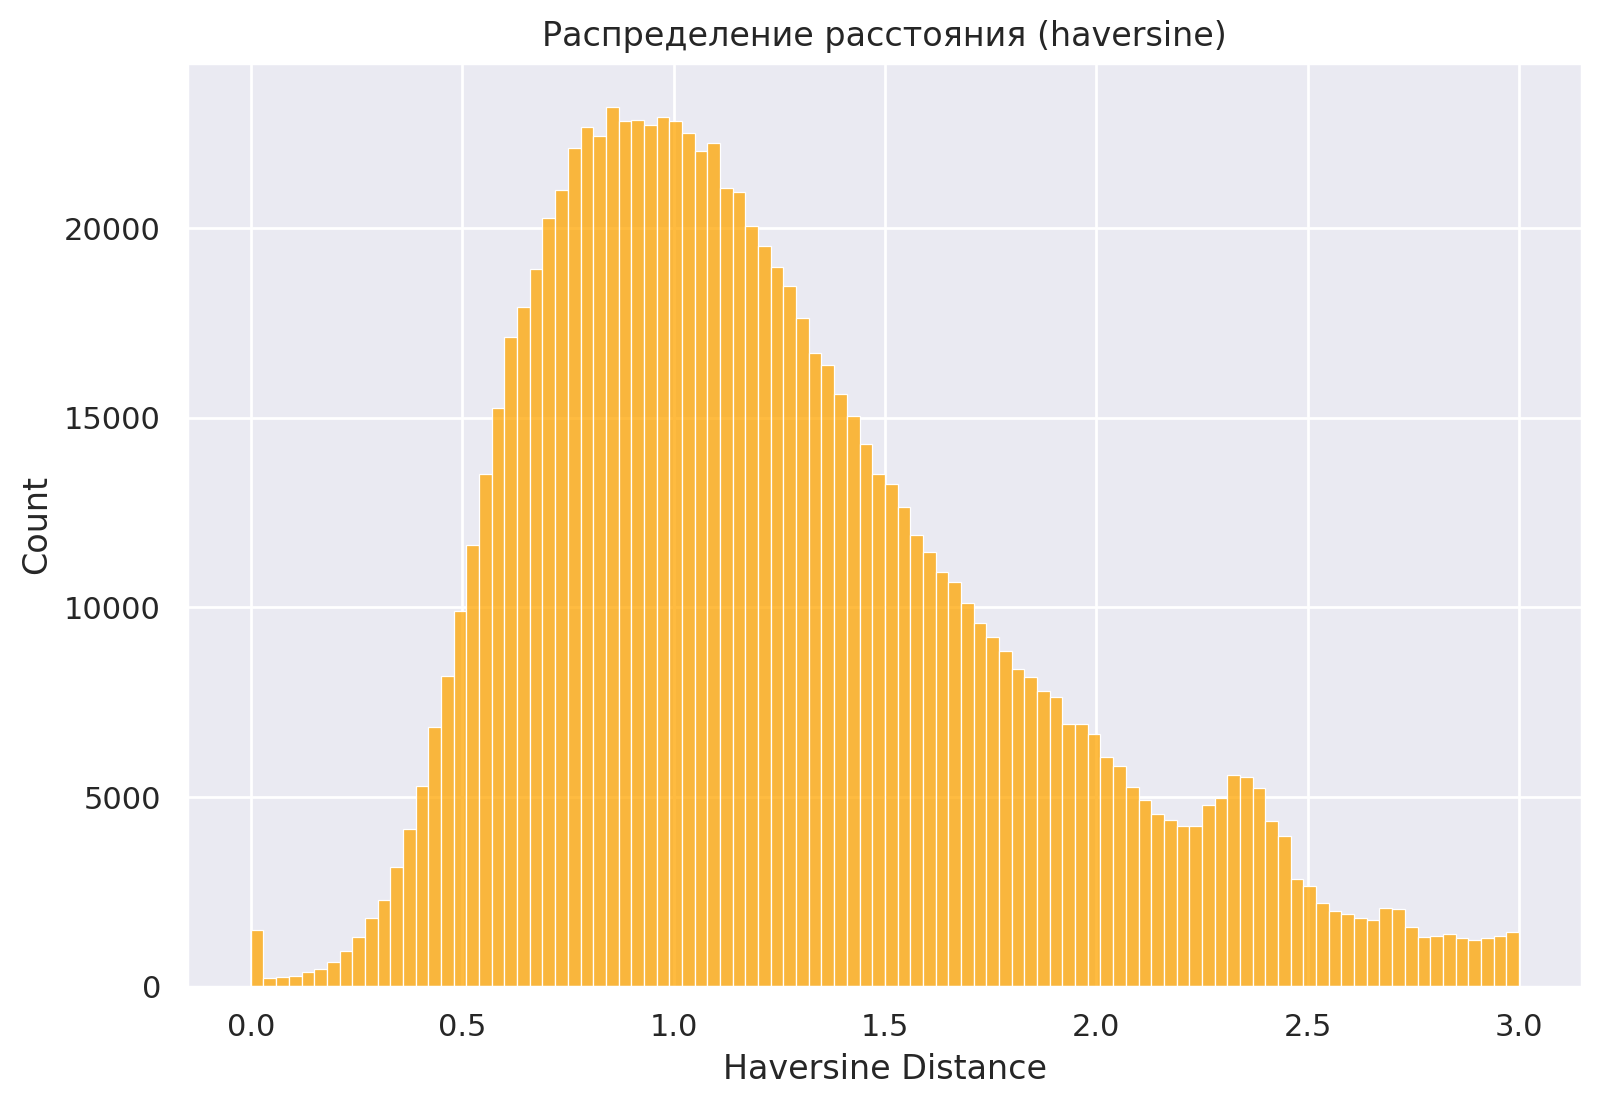

In [87]:
plt.figure(figsize=(9, 6))
sns.histplot(train['log_haversine'], bins=100, color='orange')
plt.xlabel('Haversine Distance')
plt.title('Распределение расстояния (haversine)')

In [88]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train[['log_haversine', 'passenger_count']],train[second]], axis=1)
y_train = train['new_trip_duration']


X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test,  test[['log_haversine', 'passenger_count']],test[second]], axis=1)
y_test = test['new_trip_duration']
from sklearn.preprocessing import StandardScaler
#числовые признаки отмасштабируем(признаки - 'log_haversine', 'passenger_count')
scaler = StandardScaler()
X_train['log_haversine_scaled'] = scaler.fit_transform(X_train[['log_haversine']])
X_test['log_haversine_scaled'] = scaler.transform(X_test[['log_haversine']])

scaler = StandardScaler()
X_train['passenger_count_scaled'] = scaler.fit_transform(X_train[['passenger_count']])
X_test['passenger_count_scaled'] = scaler.transform(X_test[['passenger_count']])


print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())

Количество NaN в y_train: 0


In [89]:
ans = Ridge()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2297
RMSE = 0.4792


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Да, как и предполагалось, у нас показатель стал хуже, так как мы убрали выбросы в обучающей части, а в тестовой они остались.

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [90]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona'] #категориальные признаки

In [91]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#проверим какие категорие реже 10%
def fun_rare_categories(df, categorical_columns, x):
    rare_categories = {}

    for i in categorical_columns:

        freq = df[i].value_counts(normalize=True)
        rare = freq[freq < x].index.tolist()
        if rare:
            rare_categories[i] = rare

    return rare_categories


first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
rare_categories = fun_rare_categories(df, first, 0.01)

print(rare_categories)


{'day_of_year': [100, 107, 65, 93, 44, 128, 106, 72, 64, 58, 99, 127, 30, 135, 79, 142, 42, 78, 43, 57, 51, 37, 126, 156, 63, 71, 105, 141, 22, 16, 50, 121, 29, 120, 98, 56, 92, 9, 62, 49, 119, 70, 136, 168, 15, 125, 86, 84, 133, 36, 134, 45, 97, 124, 140, 55, 96, 101, 35, 162, 21, 76, 13, 85, 114, 111, 161, 155, 154, 41, 103, 104, 14, 77, 108, 138, 176, 8, 80, 146, 91, 48, 54, 163, 177, 169, 66, 69, 175, 147, 74, 112, 94, 137, 28, 113, 75, 90, 167, 20, 160, 110, 139, 122, 118, 153, 89, 132, 19, 95, 17, 68, 117, 159, 83, 61, 34, 38, 174, 129, 12, 131, 173, 59, 145, 143, 73, 52, 31, 33, 170, 166, 7, 47, 181, 82, 40, 157, 182, 27, 148, 115, 102, 109, 10, 60, 158, 67, 46, 6, 87, 123, 179, 144, 11, 180, 81, 88, 53, 5, 130, 1, 18, 152, 165, 164, 39, 178, 32, 116, 149, 171, 26, 172, 4, 2, 150, 3, 25, 151, 24, 23], 'pickup_zona': [12, 2, 11, 6, 3, 7, 16], 'dropoff_zona': [12, 2, 6, 3, 11, 7, 16]}


Получается, что объединять часы, дни недели, месяцы не имеет смысла. Нужно проверить дни в году и зоны еще раз.

In [92]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
d = fun_rare_categories(df, first, 0.004)

print(d)

{'day_of_year': [151, 24, 23], 'pickup_zona': [2, 11, 6, 3, 7, 16], 'dropoff_zona': [11, 7, 16]}


In [93]:
#объединим дни в году
days_to_combine = [151, 24, 23]
train['day_of_year'] = train['day_of_year'].apply(lambda x: 151 if x in days_to_combine else x)
test['day_of_year'] = test['day_of_year'].apply(lambda x: 151 if x in days_to_combine else x)

In [94]:
zones_to_combine = [2, 11, 6, 3, 7, 16]
train['pickup_zona'] = train['pickup_zona'].apply(lambda x: 2 if x in zones_to_combine else x)
test['pickup_zona'] = test['pickup_zona'].apply(lambda x: 2 if x in zones_to_combine else x)


In [95]:
dropoff_zones_to_combine = [11, 7, 16]

train['dropoff_zona'] = train['dropoff_zona'].apply(lambda x: 11 if x in dropoff_zones_to_combine else x)

test['dropoff_zona'] = test['dropoff_zona'].apply(lambda x: 11 if x in dropoff_zones_to_combine else x)


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [96]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train[['log_haversine', 'passenger_count']],train[second]], axis=1)
y_train = train['new_trip_duration']


X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test,  test[['log_haversine', 'passenger_count']],test[second]], axis=1)
y_test = test['new_trip_duration']
from sklearn.preprocessing import StandardScaler
#числовые признаки отмасштабируем(признаки - 'log_haversine', 'passenger_count')
scaler = StandardScaler()
X_train['log_haversine_scaled'] = scaler.fit_transform(X_train[['log_haversine']])
X_test['log_haversine_scaled'] = scaler.transform(X_test[['log_haversine']])

scaler = StandardScaler()
X_train['passenger_count_scaled'] = scaler.fit_transform(X_train[['passenger_count']])
X_test['passenger_count_scaled'] = scaler.transform(X_test[['passenger_count']])


print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())

Количество NaN в y_train: 0


In [97]:
ans = Ridge()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2298
RMSE = 0.4794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ошибка стала больше

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [98]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'new_trip_duration', 'day', 'month_name', 'day_of_week', 'weekday',
       'month', 'hour', 'day_of_year', 'haversine', 'log_haversine', 'traffic',
       'free', 'pickup_man', 'drop_man', 'pickup_airk', 'drop_airk',
       'pickup_airl', 'drop_airl', 'pickup_zona', 'dropoff_zona', 'snow',
       'memorial_day'],
      dtype='object')


In [99]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
len(df.columns)

32

мы используем не все эти признаки

не используем: 'id', 'vendor_id', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'new_trip_duration', 'month_name', 'haversine','day_of_week', 'day'

получается используем 18 признака

In [100]:
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona']
df_encoded = pd.get_dummies(df, columns=first, drop_first=True)
len(df_encoded.columns)

281

Тоже нужно вычесть 14 признаков, которые не используем. Получим 267 признаков

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [101]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

ans = Lasso()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.6321
RMSE = 0.7950


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Lasso значительно хуже, чем Ridge

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [102]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Для Lasso:

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 5)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], cv=5, n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)



Best alpha = 0.0100


In [ ]:
ans = Lasso(alpha=0.0100)
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2574
RMSE = 0.5073


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-2, 3, 5)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], cv=5, n_jobs=-1)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)


Best alpha = 3.1623


In [ ]:
ans = Ridge(alpha=3.1623)
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2298
RMSE = 0.4794


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Мы видим, что MSE для Lasso значительно стал лучше, для Ridge не изменился(но все еще остался лучше).

Сохраните наилучшее значение, как бенчмарк на будущее

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_log_error
best_rmsle = mean_squared_log_error(y_test, result, squared=False)
print(best_rmsle)

0.07057795182849783


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:675: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

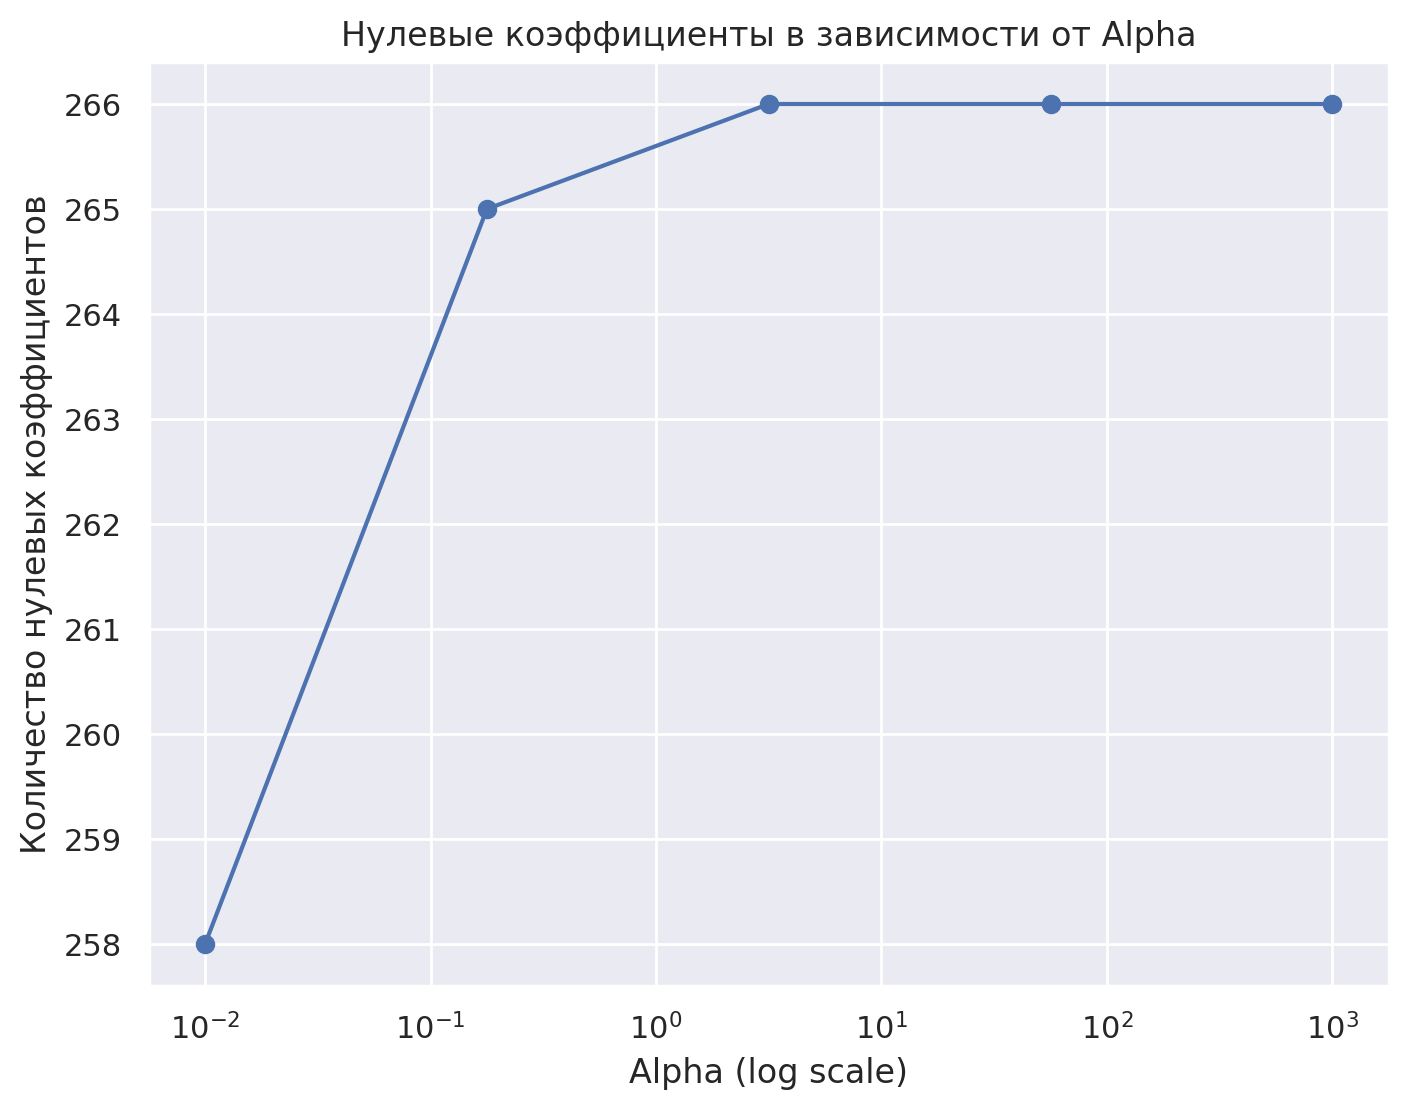

In [ ]:
alphas_range=  np.logspace(-2, 3, 5)

zero_coefficients = []
for alpha_value in alphas_range:

    model_lasso = Lasso(alpha=alpha_value)
    model_lasso.fit(X_train, y_train)
    zero_count = np.sum(model_lasso.coef_ == 0)
    zero_coefficients.append(zero_count)
plt.figure(figsize=(8, 6))
plt.plot(alphas_range, zero_coefficients, marker='o', color='b')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Количество нулевых коэффициентов")
plt.title("Нулевые коэффициенты в зависимости от Alpha")
plt.grid(True)

plt.show()

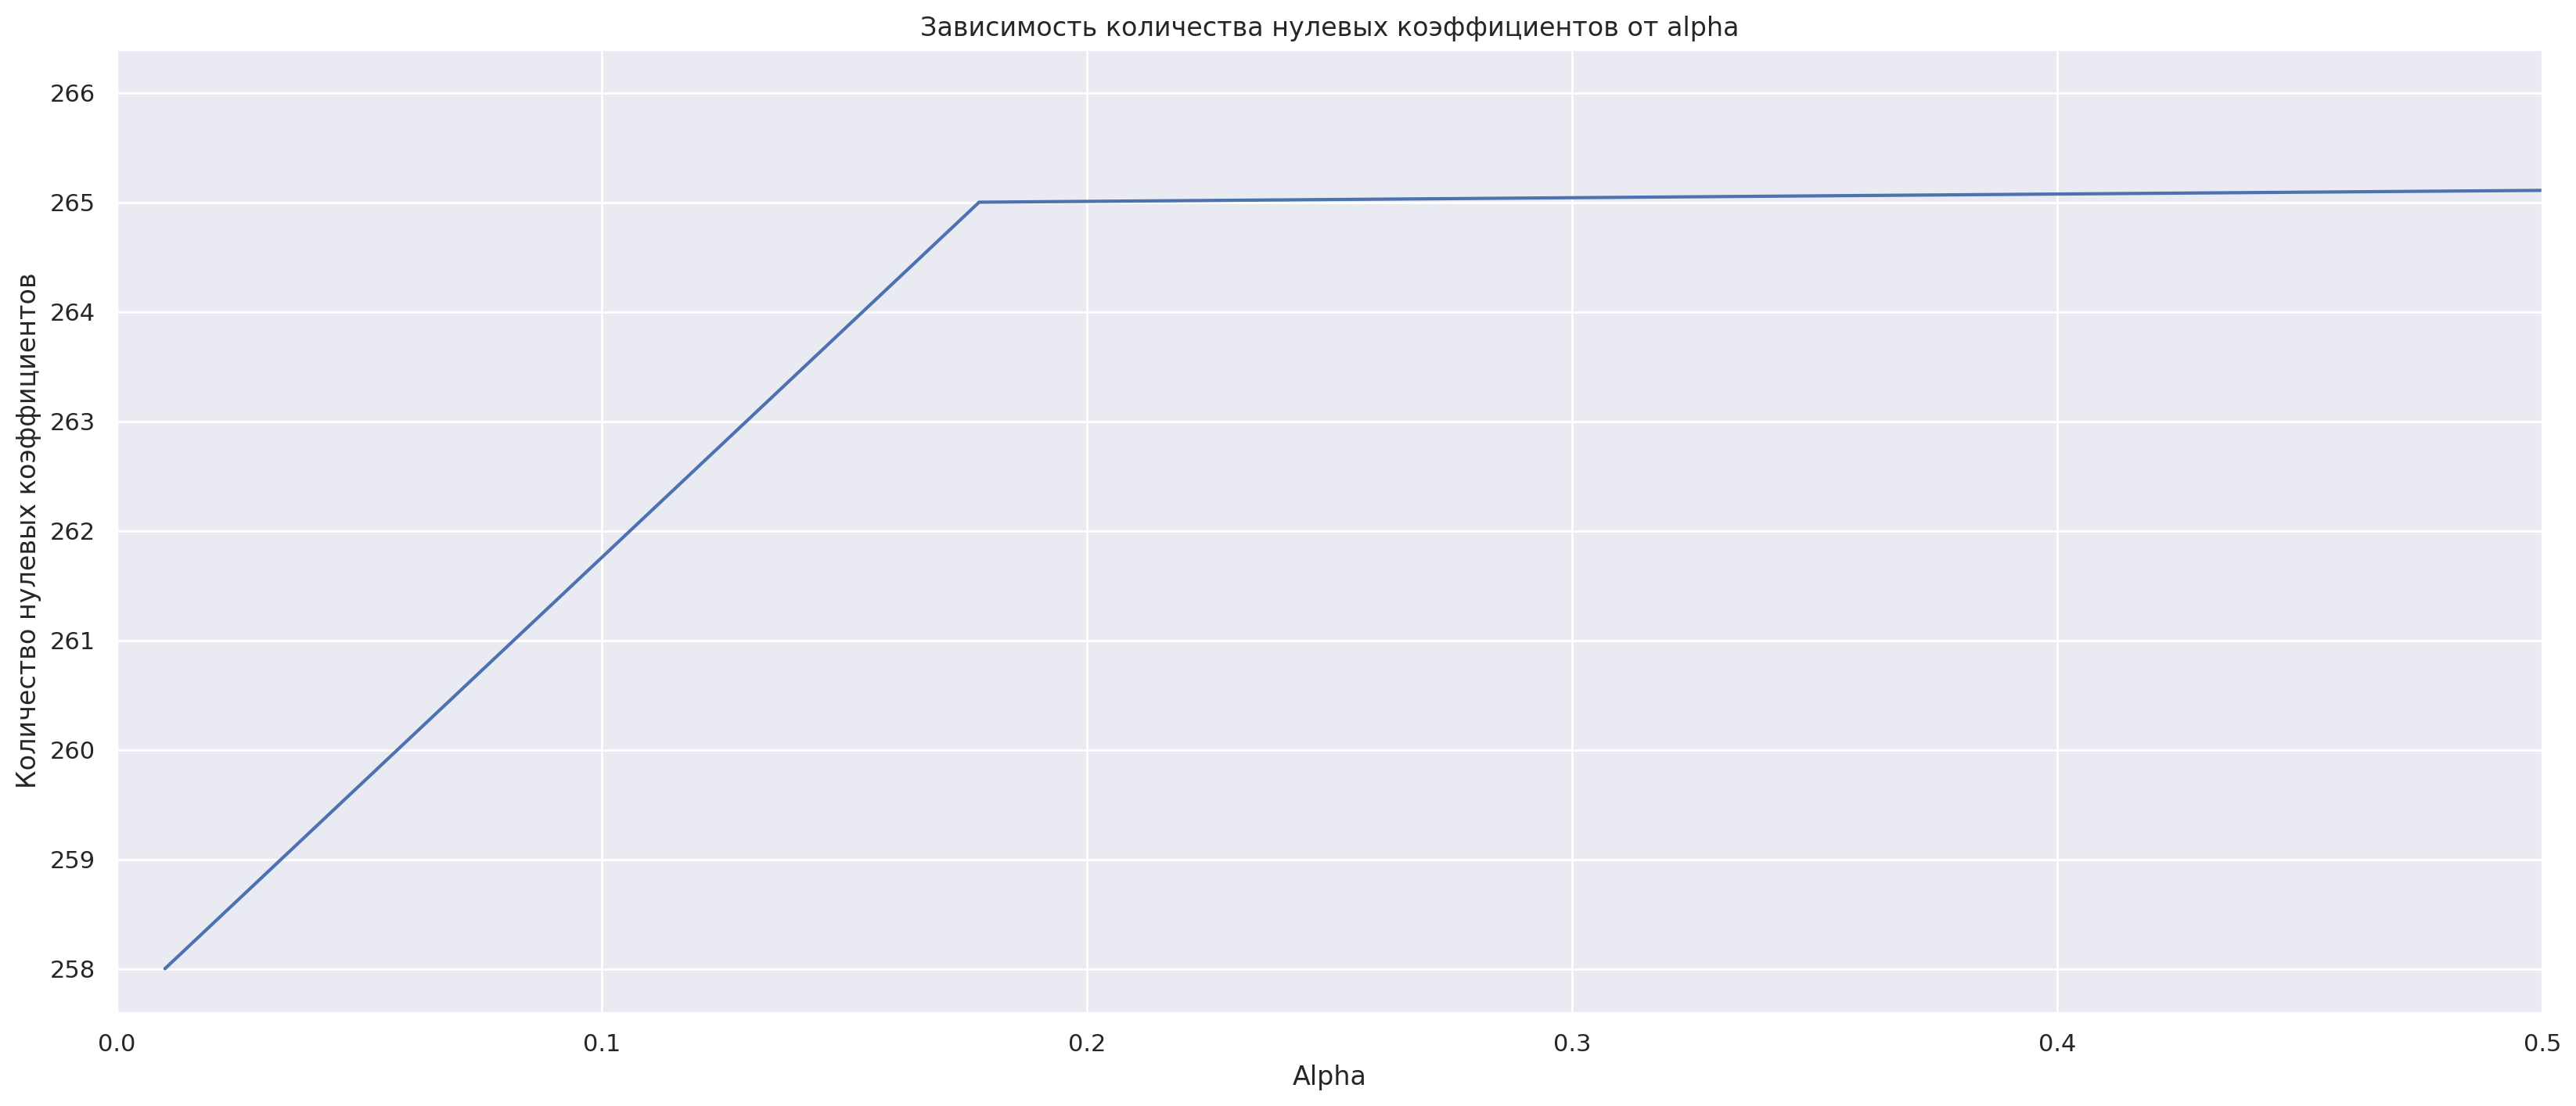

In [ ]:
plt.plot(alphas_range, zero_coefficients)
plt.xlabel("Alpha")
plt.ylabel("Количество нулевых коэффициентов")
plt.title("Зависимость количества нулевых коэффициентов от alpha")
plt.grid(True)
plt.xlim(0, 0.5)

plt.show()

У нас 267 признаков, если обнулим половину - 133 признака, это параметр меньше 0.01

In [105]:
ans = Lasso(alpha=0.001)
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2331
RMSE = 0.4828


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [106]:
zero_count = np.sum(ans.coef_ == 0)
print(zero_count)

208


Мы онулировали только 60 признаков, и у нас улучшился mse(может он не совсем правильно обучился на валидационной выборке). Также когда мы уменьшаем параметр регуляризации alpha в Lasso, наша модель становится менее строгой и лучше подстраивается под данные. Это позволяет ей учитывать больше информации от признаков, что может привести к снижению MSE. Однако слишком малое значение alpha может вызвать переобучение, при котором модель будет хуже работать на новых данных.

In [107]:
ans = Lasso(alpha=0.0001)
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.260e+02, tolerance: 3.357e+01
  model = cd_fast.enet_coordinate_descent(


MSE = 0.2301
RMSE = 0.4797


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
zero_count = np.sum(ans.coef_ == 0)
print(zero_count)

103


Онулировали даже больше половины, качество улучшилось

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [110]:
train.columns

Index(['id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'new_trip_duration', 'day', 'month_name',
       'day_of_week', 'weekday', 'month', 'hour', 'day_of_year', 'haversine',
       'log_haversine', 'traffic', 'free', 'pickup_man', 'drop_man',
       'pickup_airk', 'drop_airk', 'pickup_airl', 'drop_airl', 'pickup_zona',
       'dropoff_zona', 'snow', 'memorial_day', 'resis'],
      dtype='object')

In [112]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['route_pair'] = list(zip(train['pickup_zona'], train['dropoff_zona']))
top_routes = train['route_pair'].value_counts().nlargest(100).index
train['frequent_route'] = train['route_pair'].apply(lambda x: x if x in top_routes else -1)

test['route_pair'] = list(zip(test['pickup_zona'], test['dropoff_zona']))
test['frequent_route'] = test['route_pair'].apply(lambda x: x if x in top_routes else -1)

In [114]:
train['frequent_route']

1011257     (9, 13)
178550      (9, 18)
551460     (19, -1)
1434271      (5, 9)
1173610    (14, 17)
             ...   
259178           -1
1414414     (14, 9)
131932           -1
671155     (14, 14)
121958           -1
Name: frequent_route, Length: 949404, dtype: object

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [119]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
first = ['hour', 'weekday', 'month', 'day_of_year', 'pickup_zona',
       'dropoff_zona', 'frequent_route']
second = ['snow', 'memorial_day', 'traffic',
       'free', 'pickup_man', 'pickup_airk', 'pickup_airl', 'drop_man',
       'drop_airk', 'drop_airl']
X_train = pd.get_dummies(train[first], columns=first, prefix=first)
X_train = pd.concat([X_train, train[['log_haversine', 'passenger_count']],train[second]], axis=1)
y_train = train['new_trip_duration']


X_test = pd.get_dummies(test[first], columns=first, prefix=first)
X_test = pd.concat([X_test,  test[['log_haversine', 'passenger_count']],test[second]], axis=1)
y_test = test['new_trip_duration']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
from sklearn.preprocessing import StandardScaler
#числовые признаки отмасштабируем(признаки - 'log_haversine', 'passenger_count')
scaler = StandardScaler()
X_train['log_haversine_scaled'] = scaler.fit_transform(X_train[['log_haversine']])
X_test['log_haversine_scaled'] = scaler.transform(X_test[['log_haversine']])

scaler = StandardScaler()
X_train['passenger_count_scaled'] = scaler.fit_transform(X_train[['passenger_count']])
X_test['passenger_count_scaled'] = scaler.transform(X_test[['passenger_count']])


print("Количество NaN в y_train:", y_train.isna().sum())
if y_train.isna().sum() > 0:
    y_train = y_train.fillna(y_train.median())

Количество NaN в y_train: 0


In [120]:
ans = Ridge()
ans.fit(X_train, y_train)

result = ans.predict(X_test)
print("MSE = %.4f" % mean_squared_error(y_test, result))
print("RMSE = %.4f" % mean_squared_error(y_test, result, squared=False))

MSE = 0.2197
RMSE = 0.4687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE = 0.2298, стало лучше на 0.01, в целом хорошее изменение

С помощью нового признака наша модель видит самые популярные марштруты, больше внимания на них, а не на остальные, которые могут быть очень редкими. Также модель видит сразу маршрут, а не две отдельные точки, что улучшает обучение.

В линейной модели предполагается, что все признаки незавсисимые, не модет проследить связь начала и конца маршрута. Если модель сама начнет искать связи между началом и концом, может больше обращать вниямания на более редкие, что приведет к переобучению.

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

https://ru.stackoverflow.com/questions/1161594/Разбиение-области-на-ячейки-и-присвоение-меток-с-началом-и-концом для 9 задания